## <h1 style="text-align: center">UC Berkeley // Machine Learning and Artificial Intelligence</h1>
<h2 style="text-align: center;">Capstone Project</h2>
<h3 style="text-align: center; border: 2px dashed; padding: 25px 25px; color: blue; font-weight: bold; font-style: italic;">Is My Airline Flight Likely to be Cancelled or Diverted?</br></br><span style="text-align: center; color:black; font-size:16px; font-weight: normal; font-style: normal; ">(A Classification Problem)</br></br><strong>Student:</strong> Ameet Doshi</br><strong>Facilitator:</strong> Dr. Matilde D'Amelio</span></h3>

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">1.0 Business Understanding</h2>
    
### 1.1 Introduction
Flight delays, cancellations or diversions experienced by airline travellers are can both emotionally and physically impact the enjoyment of the planned journey, as well as create negative sentiment for the airline. 

There are a number of factors that may result in a flight being delayed, cancelled or diverted (generally, a "flight change"), including issues stemming from:
* The airline carrier
* Aircraft issues (e.g. requiring engineering resolution)
* Weather along the flight path
* The originating or destination airports (security, congestion)
* Personnel issues (e.g. staff shortage, out of flight time)

### 1.2 Business Goals and KPIs
As an airline traveller/customer, could we benefit from a deeper understanding of what conditions may cause a flight change, such that we may try to avoid those conditions when booking or rescheduling a flight?
1. Improve traveller satisfaction, and therefore airline brand sentiment, by indicating to a flight customer when a flight change may be more probable.
2. ............need more here.........


### 1.3 Data Mining Questions and Goals
1. Understand if there are any correlations between the airline carrier, individual plane, or airport to an unexpected flight change.
2. Understand if certain days of the week or month have higher propensity for flight changes.
3. Understand if flight duration plays a role in propensity for flight changes.
4. Test different classification models, measuring each's score and loss function to suggest which may be the best to classify and predict future flight changes.

### 1.4 Sourcing the Data
As [summarized by Data Society](https://data.world/data-society/airlines-delay), the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly [Air Travel Consumer Report](https://www.transportation.gov/individuals/aviation-consumer-protection/air-travel-consumer-reports), published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">2.0 Data Understanding</h2>

### 2.1 Gathering the Data
The full dataset consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 
* The data comes originally from [RITA](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ) where it is described in detail (not all features are retained from original dataset)
* For purposes of this capstone project, datasets were downloaded from the Harvard Dataverse: [Data Expo 2009: Airline on time data](https://doi.org/10.7910/DVN/HG7NV7)
* A subset of the available dataset will be used for performance and manageability considerations (for 2008), which contains approximately 2.4MM records with 29 features. 

### 2.2 Feature (column) Descriptions
| Feature           | Values | Comments |
| :---------------- | :------ | :----: |
| Year       |   1987-2008   | _for full dataset, a subset is used for performance_ |
| Month       |   1-12   |  |
| DayofMonth       |   1-31   |  |
| DayOfWeek       |   1 (Monday) - 7 (Sunday)   |  |
| DepTime       |   actual departure time (local, hhm m)   |  |
| CRSDepTime       |   scheduled departure time (local, hhmm)   |  |
| ArrTime       |   actual arrival time (local, hhmm)   |  |
| CRSArrTime       |   scheduled arrival time (local, hhmm)   |  |
| UniqueCarrier       |   unique carrier code   |  |
| FlightNum       |   flight number   |  |
| TailNum       |   plane tail number   |  |
| ActualElapsedTime       |   in minutes   |  |
| CRSElapsedTime       |   in minutes   |  |
| AirTime       |   in minutes   |  |
| ArrDelay       |   arrival delay, in minutes   |  |
| DepDelay       |   departure delay, in minutes   |  |
| Origin       |   origin IATA airport code   |  |
| Dest       |   destination IATA airport code   |  |
| Distance       |   in miles   |  |
| TaxiIn       |   taxi in time, in minutes   |  |
| TaxiOut       |   taxi out time, in minutes   |  |
| Cancelled       |   was the flight cancelled?   |  |
| CancellationCode       |   reason for cancellation    | (A = carrier, B = weather, C = NAS, D = security) |
| Diverted       |   1 = yes, 0 = no   |  |
| CarrierDelay       |   in minutes   |  |
| WeatherDelay       |   in minutes   |  |
| NASDelay       |   in minutes   |  |
| SecurityDelay       |   in minutes   |  |
| LateAircraftDelay       |   in minutes   |  |

### 2.3 Prepare the Environment and Notebook
* Import relevant packages and modules, and set any needed configurations 
* Load the data
* Sanitize and optimize the dataframe as needed (for data exploration and pre-processing)

#### 2.3.1 Import Packages

In [1]:
import time
import pickle
import warnings
import os

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay

from sklearn import set_config

# Library to improve printed tabular data readability
%pip install tabulate
from tabulate import tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### 2.3.2 Environment Configurations

In [2]:
# Default plot figure sizes
plt.rcParams["figure.figsize"] = (16, 5)

# Pipeline configuration visualization
set_config(display="diagram")

# Silence any warnings
#warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# see all columns
pd.options.display.max_columns = 50

#### 2.3.3 Load Data
***Note:*** _For performance and manageability considerations, only using 2008 dataset, though a later test may use 2007 dataset as a validation set_

In [3]:
# There are numerous years of data available on the Harvard 
df = pd.read_csv("data/dataset-harvard-delayed-flights-2008.csv.bz2", compression="bz2", sep=",")
df.head()

Year  Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
0  2008      1           3          4 1343.0000        1325 1451.0000   
1  2008      1           3          4 1125.0000        1120 1247.0000   
2  2008      1           3          4 2009.0000        2015 2136.0000   
3  2008      1           3          4  903.0000         855 1203.0000   
4  2008      1           3          4 1423.0000        1400 1726.0000   

   CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0        1435            WN        588  N240WN            68.0000   
1        1245            WN       1343  N523SW            82.0000   
2        2140            WN       3841  N280WN            87.0000   
3        1205            WN          3  N308SA           120.0000   
4        1710            WN         25  N462WN           123.0000   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0         70.0000  55.0000   16.0000   18.0000    HOU  LIT       393  4.0000   
1         85.0000  71.0000    2.0000    5.0000    HOU  MAF       441  3.0000   
2         85.0000  71.0000   -4.0000   -6.0000    HOU  MAF       441  2.0000   
3        130.0000 108.0000   -2.0000    8.0000    HOU  MCO       848  5.0000   
4        130.0000 107.0000   16.0000   23.0000    HOU  MCO       848  6.0000   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0   9.0000          0              NaN         0       16.0000        0.0000   
1   8.0000          0              NaN         0           NaN           NaN   
2  14.0000          0              NaN         0           NaN           NaN   
3   7.0000          0              NaN         0           NaN           NaN   
4  10.0000          0              NaN         0       16.0000        0.0000   

   NASDelay  SecurityDelay  LateAircraftDelay  
0    0.0000         0.0000             0.0000  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       NaN            NaN                NaN  
4    0.0000         0.0000             0.0000

#### 2.3.4 Sanitize and optimize dataframe
These updates to the dataframe column names and data types will aide efficiency in later preparation and modeling steps.

##### 2.3.4.1 Sanitize column names

In [4]:
# sanitize and standardize column names for ease of reference
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.head(1)

year  month  dayofmonth  dayofweek   deptime  crsdeptime   arrtime  \
0  2008      1           3          4 1343.0000        1325 1451.0000   

   crsarrtime uniquecarrier  flightnum tailnum  actualelapsedtime  \
0        1435            WN        588  N240WN            68.0000   

   crselapsedtime  airtime  arrdelay  depdelay origin dest  distance  taxiin  \
0         70.0000  55.0000   16.0000   18.0000    HOU  LIT       393  4.0000   

   taxiout  cancelled cancellationcode  diverted  carrierdelay  weatherdelay  \
0   9.0000          0              NaN         0       16.0000        0.0000   

   nasdelay  securitydelay  lateaircraftdelay  
0    0.0000         0.0000             0.0000

##### 2.3.4.2 Optimize dataframe data types for memory/performance

Use the `dtype-diet` package to evaluate the initial data types for each dataframe feature, and recommend more memory and disk efficient data type casting to improve runtime performance. 

In [5]:
!pip install dtype-diet

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from dtype_diet import report_on_dataframe

'''
Use `report_on_dataframe()` method to evaluate the values for each column
and recommend a dtype that still quantifies the value set, while reducing memory usage.
'''
df_dtype_analyze = report_on_dataframe(df)
df_dtype_analyze

Current dtype Proposed dtype  Current Memory (MB)  \
Column                                                                
year                      int64          int16            9332.9414   
month                     int64           int8            9332.9414   
dayofmonth                int64           int8            9332.9414   
dayofweek                 int64           int8            9332.9414   
deptime                 float64        float32            9332.9414   
crsdeptime                int64          int16            9332.9414   
arrtime                 float64        float32            9332.9414   
crsarrtime                int64          int16            9332.9414   
uniquecarrier            object       category           68830.0444   
flightnum                 int64          int16            9332.9414   
tailnum                  object       category           72847.8389   
actualelapsedtime       float64        float16            9332.9414   
crselapsedtime          float64        float16            9332.9414   
airtime                 float64        float16            9332.9414   
arrdelay                float64        float32            9332.9414   
depdelay                float64        float32            9332.9414   
origin                   object       category           69996.6543   
dest                     object       category           69996.6543   
distance                  int64          int16            9332.9414   
taxiin                  float64        float16            9332.9414   
taxiout                 float64        float16            9332.9414   
cancelled                 int64           int8            9332.9414   
cancellationcode         object       category           38149.6895   
diverted                  int64           int8            9332.9414   
carrierdelay            float64        float16            9332.9414   
weatherdelay            float64        float16            9332.9414   
nasdelay                float64        float16            9332.9414   
securitydelay           float64        float16            9332.9414   
lateaircraftdelay       float64        float16            9332.9414   

                   Proposed Memory (MB)  Ram Usage Improvement (MB)  \
Column                                                                
year                          2333.2822                   6999.6592   
month                         1166.6724                   8166.2690   
dayofmonth                    1166.6724                   8166.2690   
dayofweek                     1166.6724                   8166.2690   
deptime                       4666.5020                   4666.4395   
crsdeptime                    2333.2822                   6999.6592   
arrtime                       4666.5020                   4666.4395   
crsarrtime                    2333.2822                   6999.6592   
uniquecarrier                 1167.5200                  67662.5244   
flightnum                     2333.2822                   6999.6592   
tailnum                       2552.5435                  70295.2954   
actualelapsedtime             2333.2822                   6999.6592   
crselapsedtime                2333.2822                   6999.6592   
airtime                       2333.2822                   6999.6592   
arrdelay                      4666.5020                   4666.4395   
depdelay                      4666.5020                   4666.4395   
origin                        2345.8584                  67650.7959   
dest                          2345.9170                  67650.7373   
distance                      2333.2822                   6999.6592   
taxiin                        2333.2822                   6999.6592   
taxiout                       2333.2822                   6999.6592   
cancelled                     1166.6724                   8166.2690   
cancellationcode              1166.8696                  36982.8198   
diverted                      1166.6724  

In [7]:
'''
Using the dtype_diet.optimize_dataframe() seems to change some values
simply by applying it's recommended dtypes to the dataframe. 

Taking a snapshot of the memory for the dataframe object before and after to
indicate memory savings
'''
# convert the proposed dtypes per column into a dictionary
dict_dtypes_opt = df_dtype_analyze["Proposed dtype"].to_dict()

# get initial memory 
initial_memory = df.memory_usage(deep=True).sum()

# update dtypes, saving to a new dataframe
df_opt = df.astype(dict_dtypes_opt)

# determin how much memory was saved
final_memory = df_opt.memory_usage(deep=True).sum()
memory_savings = (initial_memory - final_memory) / initial_memory * 100

print(f"Memory usage before: {initial_memory/(1024**2)} bytes")
print(f"Memory usage after: {final_memory/(1024**2)} bytes")
print(f"Memory savings: {memory_savings:.2f}%")

Memory usage before: 1062.1283693313599 bytes
Memory usage after: 134.91320610046387 bytes
Memory savings: 87.30%


---

***💡 Insights:***
* Memory allocation was reduced by **87.3%** for the same dataset, simply by optimizing data types!
* This exercise can significantly improve modeling performance with larger datasets, at scale.

---

##### 2.3.4.3 Review the new Dataframe
* confirm sanitized column names
* confirm optimized data types (and reduced memory footprint; no data was lost in this process)

In [8]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype   
---  ------             -----   
 0   year               int16   
 1   month              int8    
 2   dayofmonth         int8    
 3   dayofweek          int8    
 4   deptime            float32 
 5   crsdeptime         int16   
 6   arrtime            float32 
 7   crsarrtime         int16   
 8   uniquecarrier      category
 9   flightnum          int16   
 10  tailnum            category
 11  actualelapsedtime  float16 
 12  crselapsedtime     float16 
 13  airtime            float16 
 14  arrdelay           float32 
 15  depdelay           float32 
 16  origin             category
 17  dest               category
 18  distance           int16   
 19  taxiin             float16 
 20  taxiout            float16 
 21  cancelled          int8    
 22  cancellationcode   category
 23  diverted           int8    
 24  carrierdelay       float

#### 2.3.5 Custom Python Helper Functions

In [9]:
def helper_print_heading ( heading, length = 120 ):
    '''
    Purpose: Uniform means to add a heading to printed information
    Inputs:
    - heading: string to use for heading, uppercased by default
    - length: override overall width consumed by title and dashes
    '''
    padding = int(( length - len(heading) - 6 ) / 2 )
    return '\n/' + ('─' * padding) + f'  {heading.upper()}  ' + ('─' * padding) + "/\n"

def primeTargetFeature ( cancelled, diverted ):
    '''
    Accepts `cancelled` and `diverted` values
    Reviews if the flight was cancelled, diverted, otherwise classifies as 'on-schedule'
    '''    
    if cancelled == 1:
        return 'cancelled'
    elif diverted == 1:
        return 'diverted'
    else:
        return 'on-schedule'

### 2.4 Explore the Data (EDA)
* Data integrity review
* Univariate analysis
* Bivariate analysis
* Observations and conclusions

#### 2.4.1 Data Integrity Review


/─────────────────────────────────────────  TOTAL MISSING VALUES BY FEATURE  ─────────────────────────────────────────/
 |                   |   Missing Values |   Percentage |
|-------------------+------------------+--------------|
| cancellationcode  |      2.32478e+06 |       97.303 |
| lateaircraftdelay |      1.80463e+06 |       75.532 |
| nasdelay          |      1.80463e+06 |       75.532 |
| securitydelay     |      1.80463e+06 |       75.532 |
| weatherdelay      |      1.80463e+06 |       75.532 |
| carrierdelay      |      1.80463e+06 |       75.532 |
| taxiin            |  70096           |        2.934 |
| airtime           |  70096           |        2.934 |
| actualelapsedtime |  70096           |        2.934 |
| arrtime           |  70096           |        2.934 |
| arrdelay          |  70096           |        2.934 |
| taxiout           |  64442           |        2.697 |
| depdelay          |  64442           |        2.697 |
| deptime           |  64442          

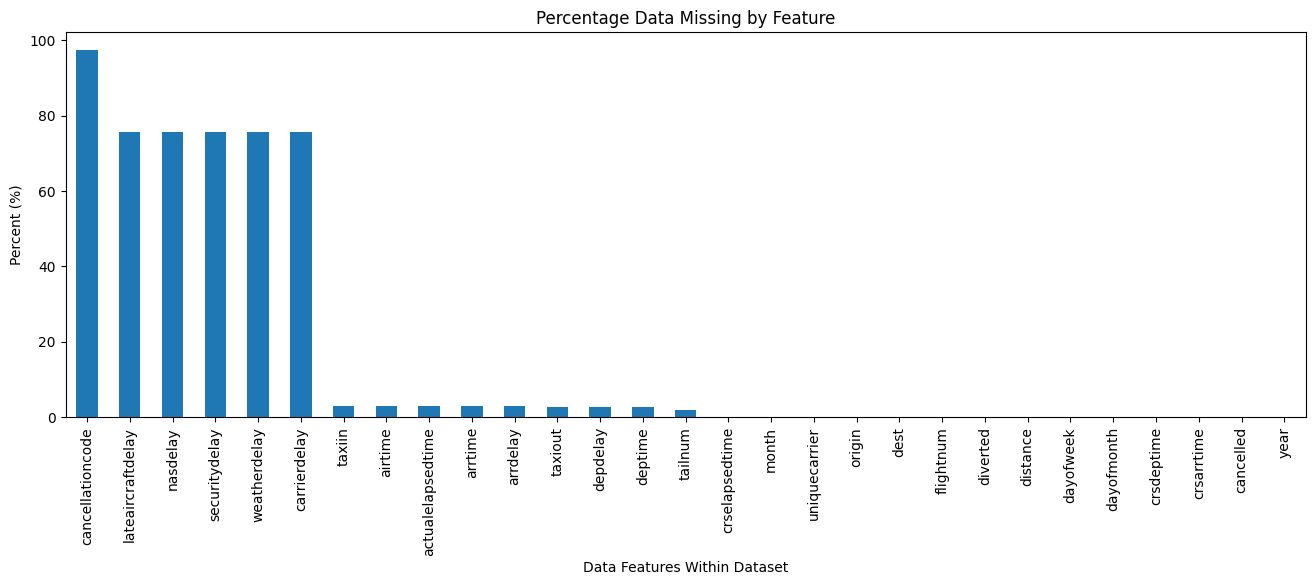

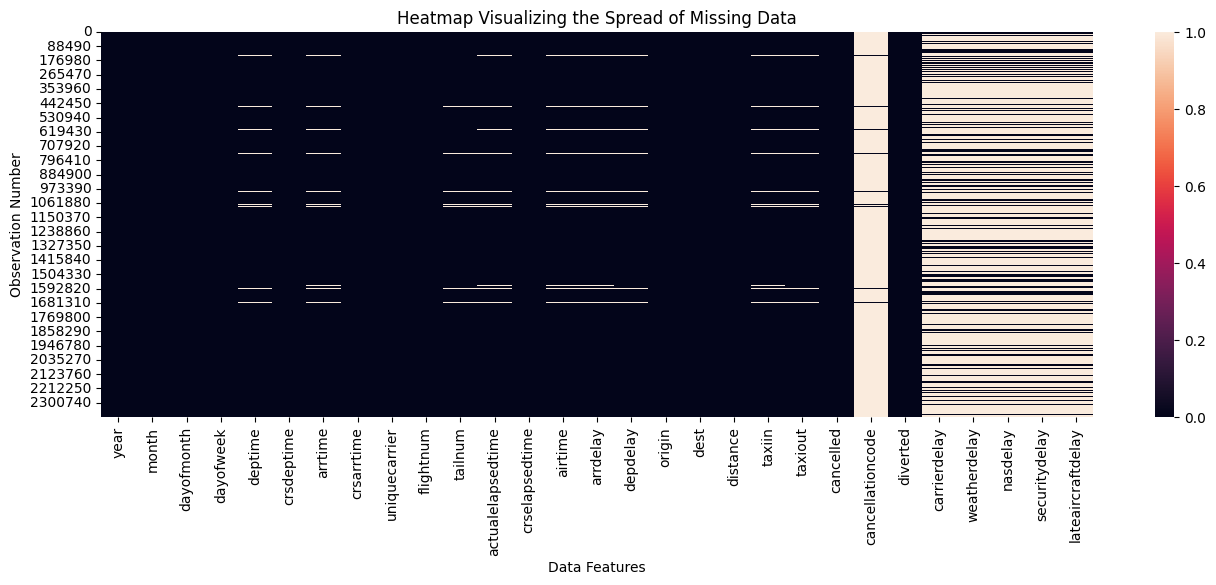

In [10]:
'''
Review missing values and duplicated records:
- tabular view to understand missing data by feature
- heatmap view to understand distribution of missing data

* good candidate for a reusable custom function (pass in DataFrame), leaving inline for class grading / inline readability
'''

df_missing_sum = df_opt.isna().sum().round(2).sort_values(ascending=False)
df_missing_perc = round(df_opt.isna().mean()*100, 3)
df_integrity = pd.DataFrame( { "Missing Values": df_missing_sum, 
                              "Percentage": df_missing_perc }
                           ).sort_values("Percentage", ascending=False)

print( helper_print_heading( 'Total Missing Values by Feature' ), tabulate( df_integrity, headers=df_integrity.columns, tablefmt="orgtbl" ), 
       "\n\n",
       helper_print_heading( 'Number of Duplicated Records in Dataset' ), f"{df_opt.duplicated().sum()} records duplicated" 
    )

df_integrity["Percentage"].plot(kind="bar", title="Percentage Data Missing by Feature")
plt.ylabel("Percent (%)")
plt.xlabel("Data Features Within Dataset")
plt.show()

# Let's visually evaluate the missing data across any data feature to understand distribution, 
# for any additional insights
sns.heatmap(df_opt.isna()).set_title("Heatmap Visualizing the Spread of Missing Data")
plt.xlabel("Data Features")
plt.ylabel("Observation Number")
plt.show()

In [11]:
'''
Initial Shape of Dataset
'''
df_opt.shape

(2389217, 29)

In [12]:
'''
Review numerical features (data type of int* or float*)
'''
df_opt.describe([.1, .2, .85, .95, .99]).T

count      mean       std       min       10%  \
year              2389217.0000 2008.0000    0.0000 2008.0000 2008.0000   
month             2389217.0000    2.5050    1.1215    1.0000    1.0000   
dayofmonth        2389217.0000   15.6639    8.7504    1.0000    4.0000   
dayofweek         2389217.0000    3.9096    1.9804    1.0000    1.0000   
deptime           2324775.0000 1340.0184  480.2717    1.0000  707.0000   
crsdeptime        2389217.0000 1329.9923  465.7833    0.0000  706.0000   
arrtime           2319121.0000 1485.8350  508.1295    1.0000  836.0000   
crsarrtime        2389217.0000 1496.7440  484.5238    1.0000  848.0000   
flightnum         2389217.0000 2213.8880 1951.3921    1.0000  235.0000   
actualelapsedtime 2319121.0000       NaN       NaN   14.0000   60.0000   
crselapsedtime    2388810.0000       NaN       NaN  -25.0000   62.0000   
airtime           2319121.0000       NaN       NaN    0.0000   40.0000   
arrdelay          2319121.0000   10.2736   39.6343  -91.0000  -16.0000   
depdelay          2324775.0000   11.4364   36.5323  -92.0000   -7.0000   
distance          2389217.0000  726.1589  557.1763   17.0000  200.0000   
taxiin            2319121.0000       NaN    0.0000    0.0000    3.0000   
taxiout           2324775.0000       NaN       NaN    0.0000    8.0000   
cancelled         2389217.0000    0.0270    0.1620    0.0000    0.0000   
diverted          2389217.0000    0.0024    0.0486    0.0000    0.0000   
carrierdelay       584583.0000       NaN       NaN    0.0000    0.0000   
weatherdelay       584583.0000       NaN       NaN    0.0000    0.0000   
nasdelay           584583.0000       NaN       NaN    0.0000    0.0000   
securitydelay      584583.0000    0.0000       NaN    0.0000    0.0000   
lateaircraftdelay  584583.0000       NaN       NaN    0.0000    0.0000   

                        20%       50%       85%       95%       99%       max  
year              2008.0000 2008.0000 2008.0000 2008.0000 2008.0000 2008.0000  
month                1.0000    3.0000    4.0000    4.0000    4.0000    4.0000  
dayofmonth           7.0000   16.0000   26.0000   29.0000   31.0000   31.0000  
dayofweek            2.0000    4.0000    6.0000    7.0000    7.0000    7.0000  
deptime            844.0000 1330.0000 1913.0000 2118.0000 2248.0000 2400.0000  
crsdeptime         840.0000 1325.0000 1900.0000 2100.0000 2230.0000 2359.0000  
arrtime           1022.0000 1516.0000 2049.0000 2240.0000 2340.0000 2400.0000  
crsarrtime        1030.0000 1520.0000 2045.0000 2235.0000 2340.0000 2400.0000  
flightnum          482.0000 1544.0000 4647.0000 5951.0000 7267.0000 9741.0000  
actualelapsedtime   72.0000  111.0000  193.0000  274.0000  361.0000  905.0000  
crselapsedtime      75.0000  111.0000  190.0000  274.0000  364.0000 1435.0000  
airtime             51.0000   87.0000  166.0000  247.0000  331.0000  886.0000  
arrdelay           -11.0000    0.0000   30.0000   80.0000  174.0000 2461.0000  
depdelay            -5.0000    0.0000   26.0000   75.0000  168.0000 2467.0000  
distance           283.0000  583.0000 1199.0000 1916.0000 2556.0000 4962.0000  
taxiin               4.0000    6.0000   10.0000   15.0000   26.0000  213.0000  
taxiout             10.0000   14.0000   24.0000   35.0000   59.0000  383.0000  
cancelled            0.0000    0.0000    0.0000    0.0000    1.0000    1.0000  
diverted             0.0000    0.0000    0.0000    0.0000    0.0000    1.0000  
carrierdelay         0.0000    0.0000   30.0000   76.0000  175.0000 2436.0000  
weatherdelay         0.0000    0.0000    0.0000   10.0000   83.0000 1148.0000  
nasdelay             0.0000    5.0000   30.0000   66.0000  153.0000 1357.0000  
securitydelay        0.0000    0.0000    0.0000    0.0000    0.0000  392.0000  
lateaircraftdelay    0.0000    0.0000   46.0000   98.0000  181.0000 1254.0000

In [13]:
df_opt.isna().mean().sort_values(ascending=False)

cancellationcode    0.9730
lateaircraftdelay   0.7553
securitydelay       0.7553
nasdelay            0.7553
weatherdelay        0.7553
carrierdelay        0.7553
actualelapsedtime   0.0293
taxiin              0.0293
airtime             0.0293
arrdelay            0.0293
arrtime             0.0293
depdelay            0.0270
deptime             0.0270
taxiout             0.0270
tailnum             0.0178
crselapsedtime      0.0002
cancelled           0.0000
dayofmonth          0.0000
dayofweek           0.0000
crsdeptime          0.0000
diverted            0.0000
crsarrtime          0.0000
flightnum           0.0000
distance            0.0000
dest                0.0000
origin              0.0000
month               0.0000
uniquecarrier       0.0000
year                0.0000
dtype: float64

In [14]:
'''
Review categorical features (data type of category)
'''
df_opt.describe( include='category' ).T

count unique     top    freq
uniquecarrier     2389217     20      WN  398966
tailnum           2346765   5031  N693BR    1526
origin            2389217    291     ATL  137014
dest              2389217    293     ATL  136950
cancellationcode    64442      4       A   26075

---

***💡 Insights: Data Integrity Review***
* **Missing Data**
    * _NaNs_ for `*delay` features are expected, as they only exist when the delay is in excess of 30 minutes, and can therefore be backfilled with `0.0` values.
    * _NaNs_ for `cancellationcode` is also expected (should only populate when cancelled), those will backfill with a default value, `N`.
    * Other missing values will need to be evaluated by feature for imputation or removal.
* **Numerical Features**
    * Based on varying orders of magnitude in numerical feature means, scaling of numerical features will be necessary when creating model pipelines.
    * Engineer higher order features (`PolynomialFeatures()`) to understand their predictive power within models.
* **Categorical Features**
    * According to an [Ashville Regional Airport article](https://flyavl.com/article/every-tail-tells-tale#:~:text=Every%20airplane%20has%20its%20own,is%20a%20paperwork%20intensive%20process.), `tailnum` is unique per aircraft currently in service. While less valuable to binarize (many unique values), it may be useful as a grouping feature to understand if a specific aircraft experiences more flight changes.
    * `uniquecarrier` will be binarized to determine if any airline companies are more prone to flight changes.
    * `origin` and `destination` may be considered for binarization, as it's quite possible certain airports may contribute greater than others, to flight changes.
    * `cancellationcode`, while it has expected missing values (when flight was completed as planned), the _NaN_ values will be imputed (backfill to "_N_"), and then binarized for more granular flight change understanding.
    * _Note:_ Binarization should be completed prior to bivariate analysis to understand correlations.
* **Target Feature**
    * The target feature does not exist as a column already, and thus must be engineered from other features (`cancelled`, `diverted`).

---

#### 2.4.2 Create Target feature and Backfill Some Missing Values
* Creation of new **target** feature `flight_outcome`, with the following class labels: `['on-schedule', 'cancelled', 'diverted']`
* Backfill `N` for missing values for `cancellationcode`
* Backfill `0.0` for missing values for `lateaircraftdelay`, `securitydelay`, `nasdelay`, `weatherdelay`, `carrierdelay`
* Revisit missing values heatmap

In [15]:
'''
Engineer New Target Feature `flight_outcome`, from `cancelled` and `diverted` features
- Use the `primeTargetFeature` custom python function, defined in section 2.3.5
'''
    
df_opt["flight_outcome"] = 'on-schedule';
df_opt["flight_outcome"] = df_opt.apply(lambda x: primeTargetFeature( x["cancelled"], x["diverted"]), axis=1)

In [16]:
df_opt["flight_outcome"].value_counts(normalize=True)

flight_outcome
on-schedule   0.9707
cancelled     0.0270
diverted      0.0024
Name: proportion, dtype: float64

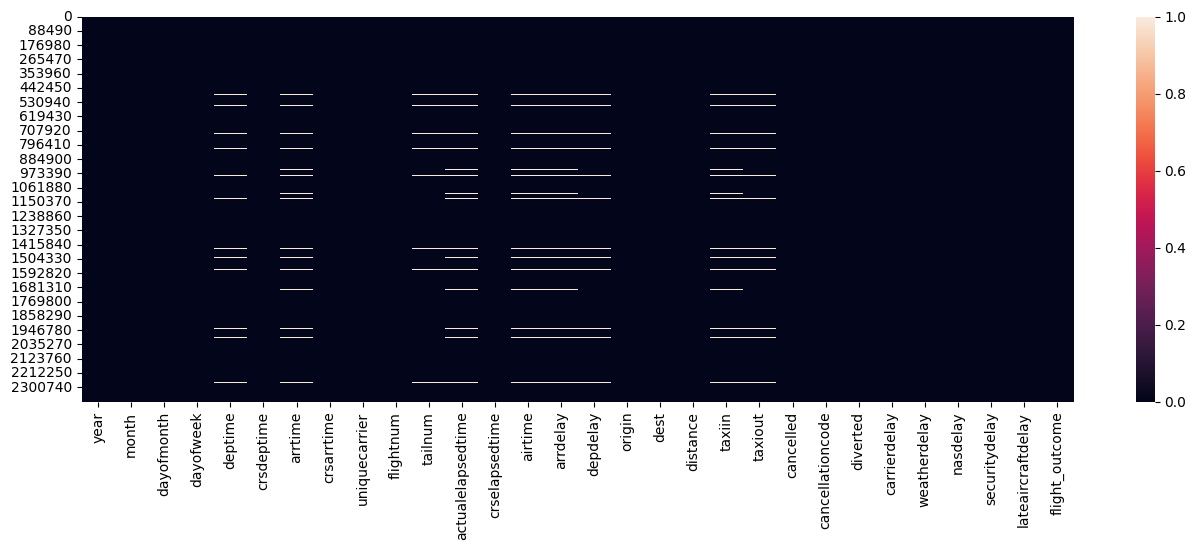

In [17]:
'''
Backfill Missing Values for Specific Features
'''
# First we need to add the new category to the feature
df_opt['cancellationcode'] = df_opt['cancellationcode'].cat.add_categories('N')

# Now we can backfill all desired features with their backfill value
df_opt.fillna({
            'cancellationcode': 'N',
            'lateaircraftdelay': 0.0,
            'securitydelay': 0.0,
            'nasdelay': 0.0,
            'weatherdelay': 0.0,
            'carrierdelay': 0.0,
        }, inplace = True)

# Review new heatmap of missing values
sns.heatmap( df_opt.isna() );

In [18]:
# What percentage records would we lose if 
rows_orig = df_opt.shape[0]
rows_dropna = df_opt.dropna().shape[0]
print(f"% data loss if we drop all missing/unknown values: {(rows_orig - rows_dropna)/rows_orig * 100:.2f}")

% data loss if we drop all missing/unknown values: 2.93


---

***💡 Insights: Data Integrity Review***
* **Missing Data**
    * _NaNs_ for `*delay` features are expected, as they only exist when the delay is in excess of 30 minutes, and can therefore be backfilled with `0.0` values.
    * _NaNs_ for `cancellationcode` is also expected (should only populate when cancelled), those will backfill with a default value, `N`.
    * Other missing values will need to be evaluated by feature for imputation or removal.
* **Numerical Features**
    * Based on varying orders of magnitude in numerical feature means, scaling of numerical features will be necessary when creating model pipelines.
    * Engineer higher order features (`PolynomialFeatures()`) to understand their predictive power within models.
* **Categorical Features**
    * According to an [Ashville Regional Airport article](https://flyavl.com/article/every-tail-tells-tale#:~:text=Every%20airplane%20has%20its%20own,is%20a%20paperwork%20intensive%20process.), `tailnum` is unique per aircraft currently in service. While less valuable to binarize (many unique values), it may be useful as a grouping feature to understand if a specific aircraft experiences more flight changes.
    * `uniquecarrier` will be binarized to determine if any airline companies are more prone to flight changes.
    * `origin` and `destination` may be considered for binarization, as it's quite possible certain airports may contribute greater than others, to flight changes.
    * `cancellationcode`, while it has expected missing values (when flight was completed as planned), the _NaN_ values will be imputed (backfill to "_N_"), and then binarized for more granular flight change understanding.
    * _Note:_ Binarization should be completed prior to bivariate analysis to understand correlations.
* **Target Feature**
    * The target feature does not exist as a column already, and thus must be engineered from other features (`cancelled`, `diverted`).

---

#### 2.4.3 Univariate Analysis
* Distribution of Categorical Features
* Distribution of Numerical Features

In [19]:
'''
Create lists for numerical and categorical feature names
'''
cols_num = df_opt.select_dtypes( exclude=[ "category" ] ).columns.tolist()
cols_cat = df_opt.select_dtypes( include=[ "category" ] ).columns.tolist()

#cols_num, cols_cat


/──────────────────────────────────────────────  FEATURE: UNIQUECARRIER  ──────────────────────────────────────────────/



uniquecarrier  proportion
0             WN      0.1670
1             AA      0.0856
2             OO      0.0817
3             MQ      0.0703
4             UA      0.0645
5             US      0.0643
6             DL      0.0634
7             XE      0.0581
8             NW      0.0514
9             CO      0.0430
10            EV      0.0387
11            9E      0.0370
12            FL      0.0364
13            YV      0.0359
14            OH      0.0301
15            B6      0.0282
16            AS      0.0209
17            F9      0.0128
18            HA      0.0077
19            AQ      0.0033

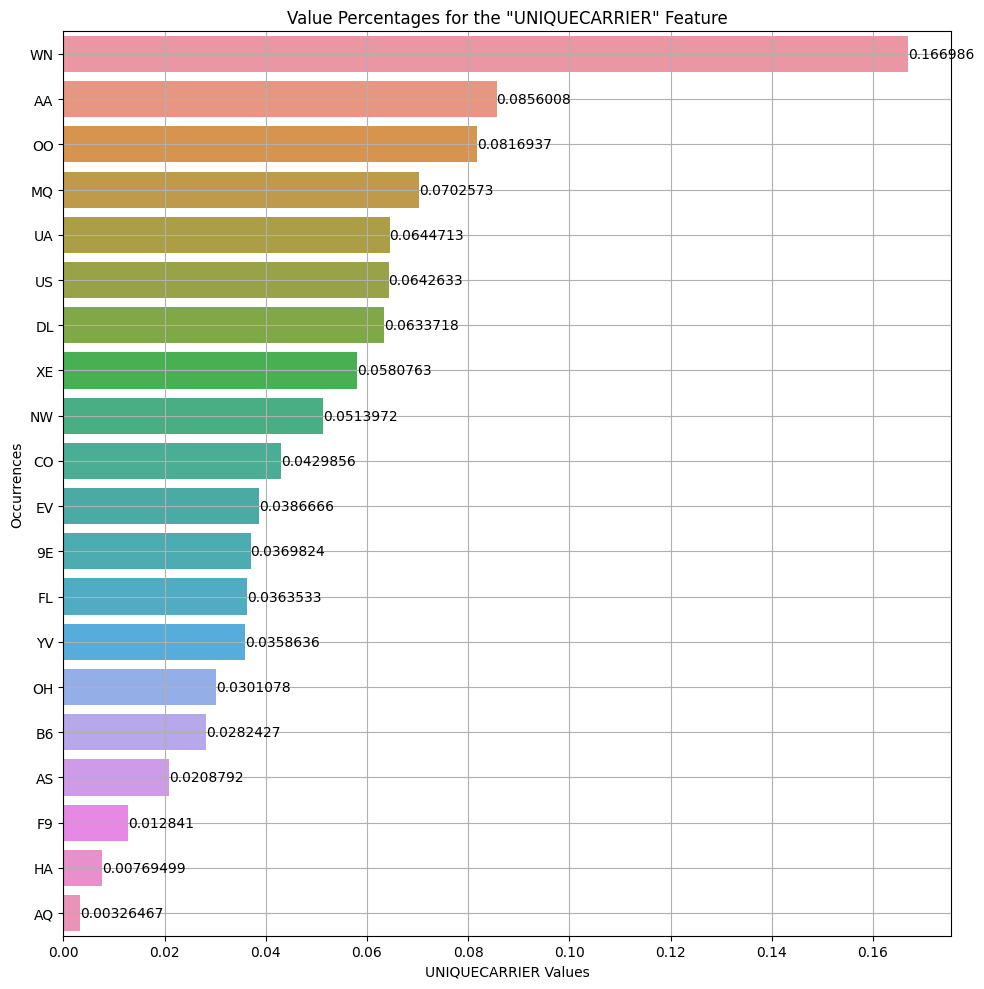


/─────────────────────────────────────────────────  FEATURE: TAILNUM  ─────────────────────────────────────────────────/



tailnum  proportion
0        NaN      0.0178
1     N693BR      0.0006
2     N646BR      0.0006
3     N476HA      0.0006
4     N485HA      0.0006
...      ...         ...
5027  N128UA      0.0000
5028  N119UA      0.0000
5029  91769E      0.0000
5030  N853NW      0.0000
5031  N199UA      0.0000

[5032 rows x 2 columns]

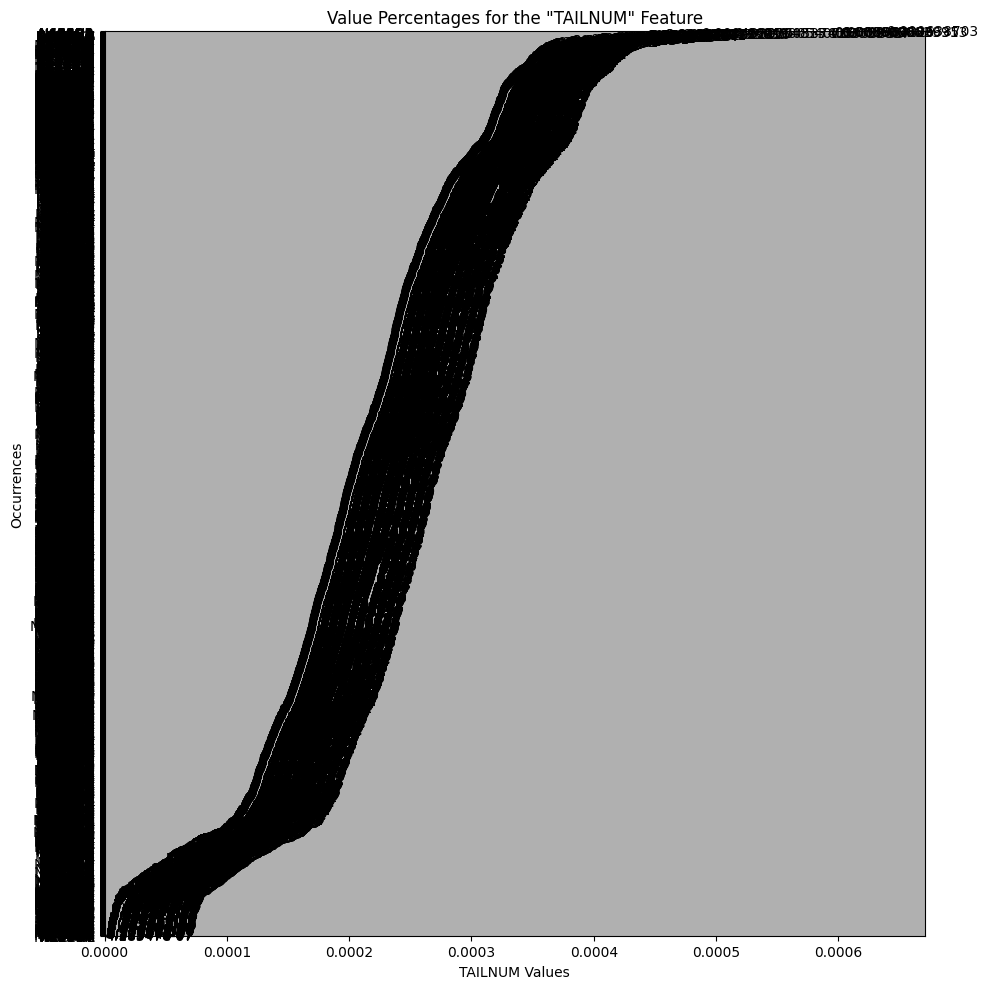


/─────────────────────────────────────────────────  FEATURE: ORIGIN  ─────────────────────────────────────────────────/



origin  proportion
0      ATL      0.0573
1      ORD      0.0494
2      DFW      0.0389
3      DEN      0.0328
4      LAX      0.0308
..     ...         ...
286    ADK      0.0000
287    RHI      0.0000
288    TUP      0.0000
289    DLG      0.0000
290    AKN      0.0000

[291 rows x 2 columns]

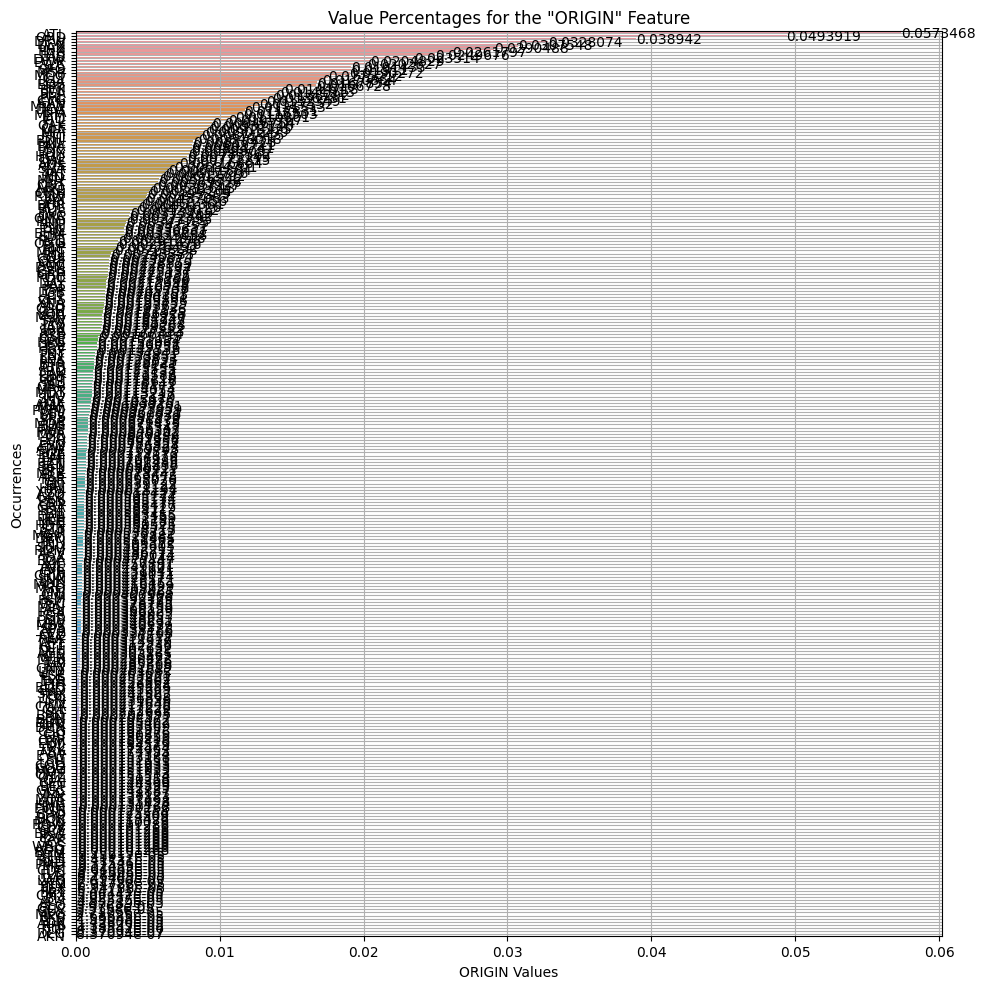


/──────────────────────────────────────────────────  FEATURE: DEST  ──────────────────────────────────────────────────/



dest  proportion
0    ATL      0.0573
1    ORD      0.0494
2    DFW      0.0390
3    DEN      0.0328
4    LAX      0.0308
..   ...         ...
288  TUP      0.0000
289  AKN      0.0000
290  OGD      0.0000
291  CYS      0.0000
292  DLG      0.0000

[293 rows x 2 columns]

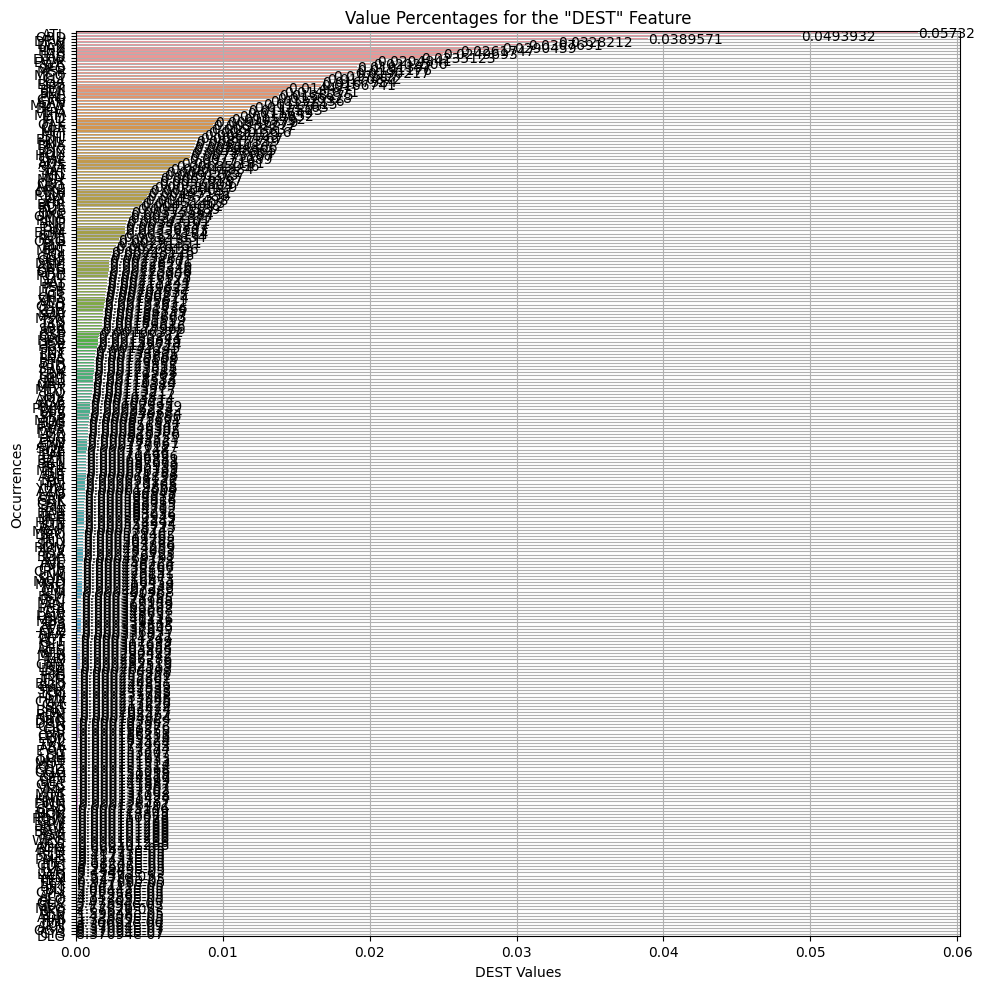


/────────────────────────────────────────────  FEATURE: CANCELLATIONCODE  ────────────────────────────────────────────/



cancellationcode  proportion
0              NaN      0.9730
1                A      0.0109
2                B      0.0108
3                C      0.0053
4                D      0.0000

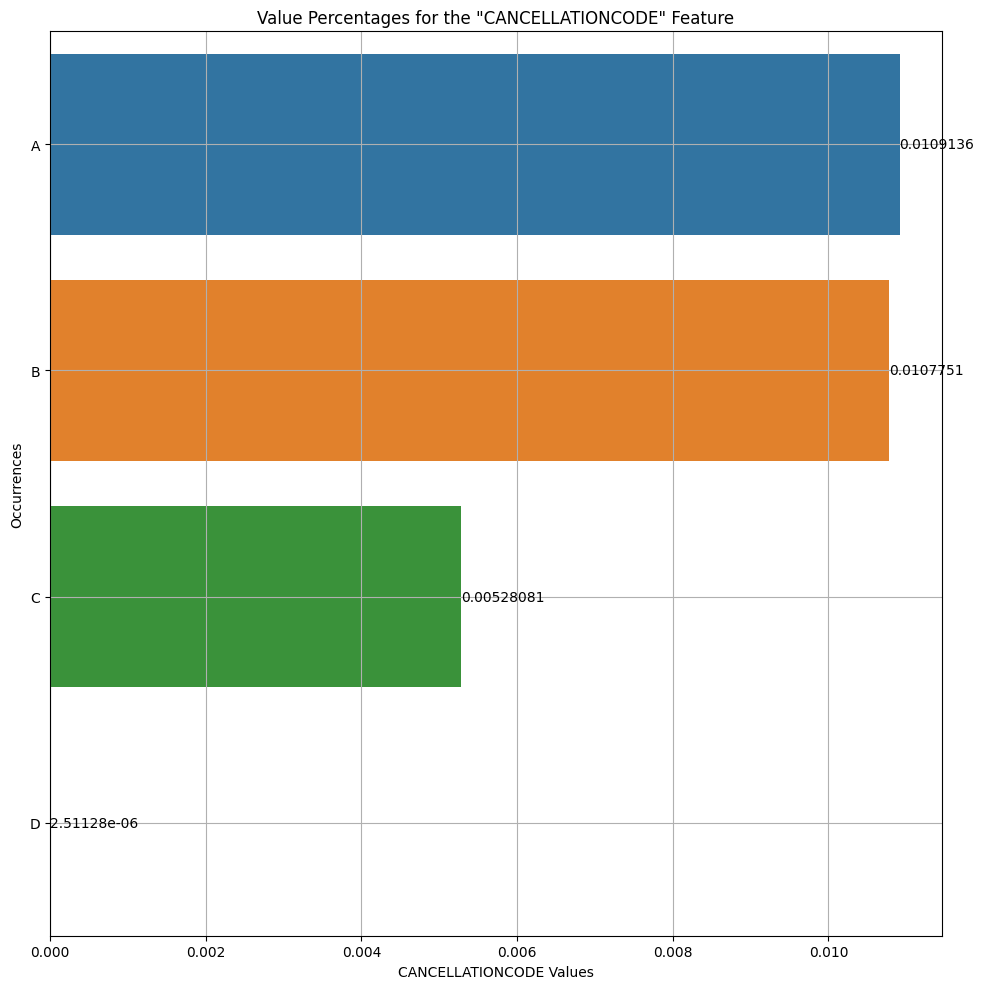

In [20]:
'''
Iterate over the categorical features:
    * Get it's unique values and counts for each
    * Plot the value counts to understand distribution
'''

for cmv in cols_cat:
    df_cmv = pd.DataFrame(df[cmv].value_counts( dropna=False, normalize=True ).sort_values( ascending=False )).reset_index()
    #df_cmv[cmv] = round( df_cmv[cmv] * 100, 3 )
    print( helper_print_heading( f'Feature: {cmv}' ))
    display(df_cmv)
    plt.figure( figsize=(10,10))
    ax = sns.barplot( df_cmv, x='proportion', y=cmv, orient='h' )
    ax.bar_label(ax.containers[0])
    plt.title(f'Value Percentages for the "{cmv.upper()}" Feature' )
    plt.xlabel(f'{cmv.upper()} Values')
    plt.ylabel('Occurrences')
    plt.tight_layout()
    plt.grid()
    plt.show()


/──────────────────────────────────────────────────  FEATURE: YEAR  ──────────────────────────────────────────────────/



year  proportion
0  2008      1.0000

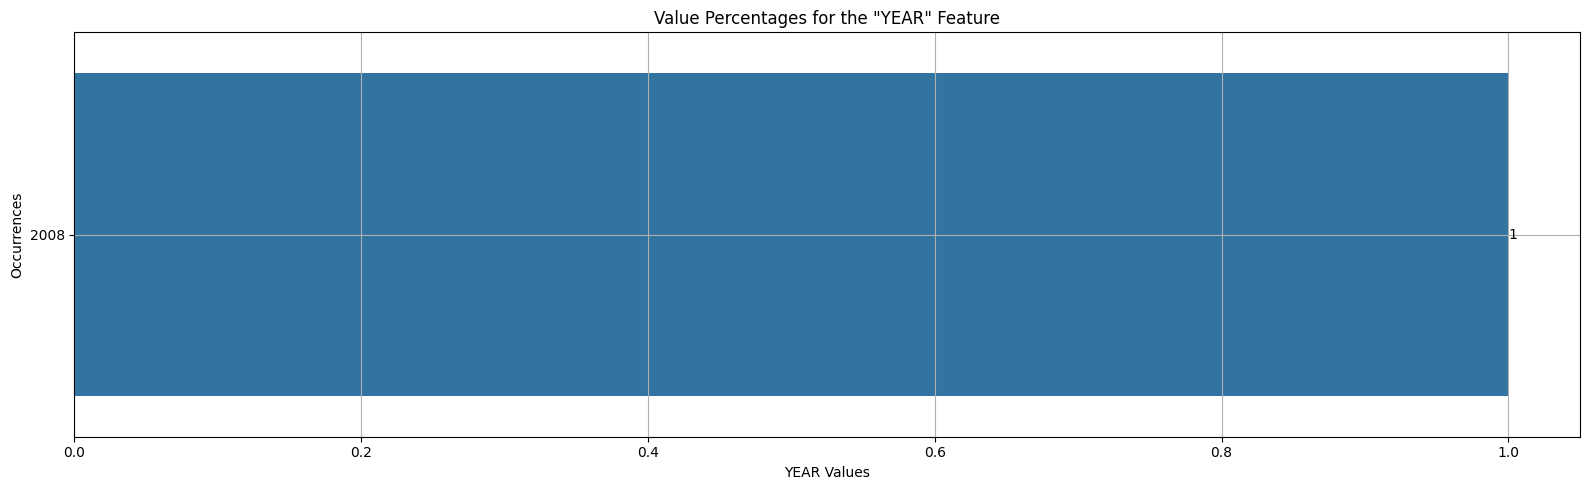


/──────────────────────────────────────────────────  FEATURE: MONTH  ──────────────────────────────────────────────────/



month  proportion
0      3      0.2579
1      1      0.2535
2      4      0.2503
3      2      0.2383

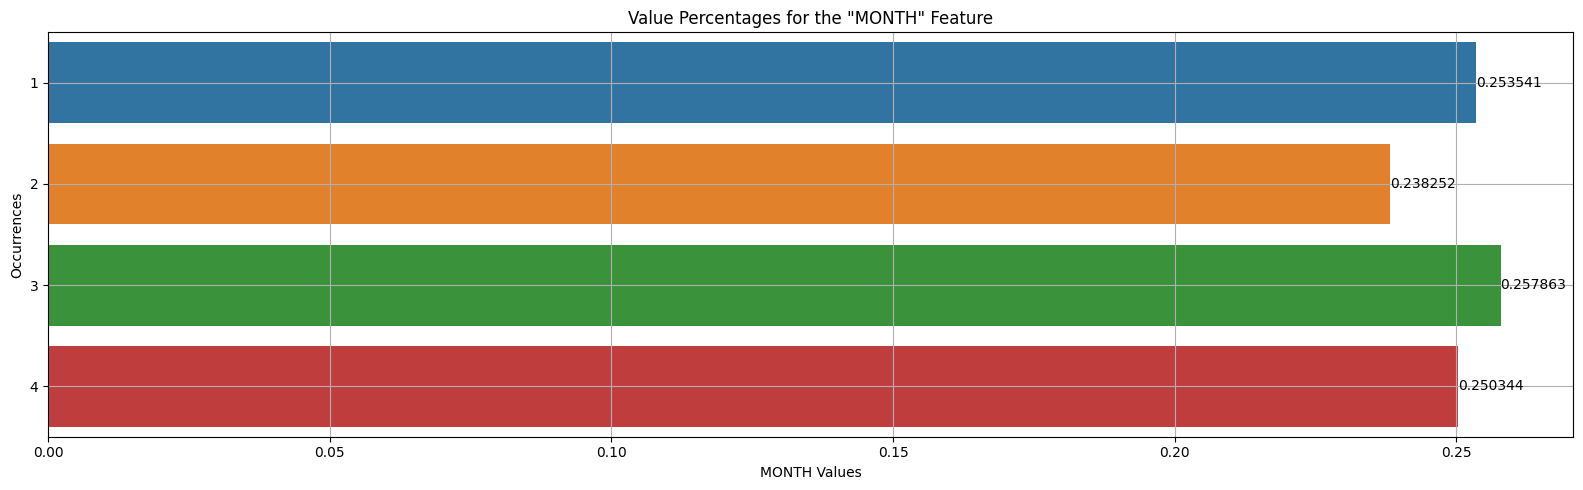


/───────────────────────────────────────────────  FEATURE: DAYOFMONTH  ───────────────────────────────────────────────/



dayofmonth  proportion
0           21      0.0344
1           14      0.0344
2            4      0.0344
3           25      0.0343
4           28      0.0343
5            7      0.0343
6           18      0.0343
7           11      0.0341
8            3      0.0339
9           24      0.0339
10          10      0.0337
11          17      0.0337
12           6      0.0334
13          20      0.0333
14          27      0.0333
15          13      0.0331
16          22      0.0325
17          15      0.0325
18          29      0.0324
19           8      0.0324
20           2      0.0322
21          16      0.0322
22          23      0.0322
23           1      0.0321
24           9      0.0318
25           5      0.0315
26          19      0.0311
27          26      0.0311
28          12      0.0308
29          30      0.0250
30          31      0.0171

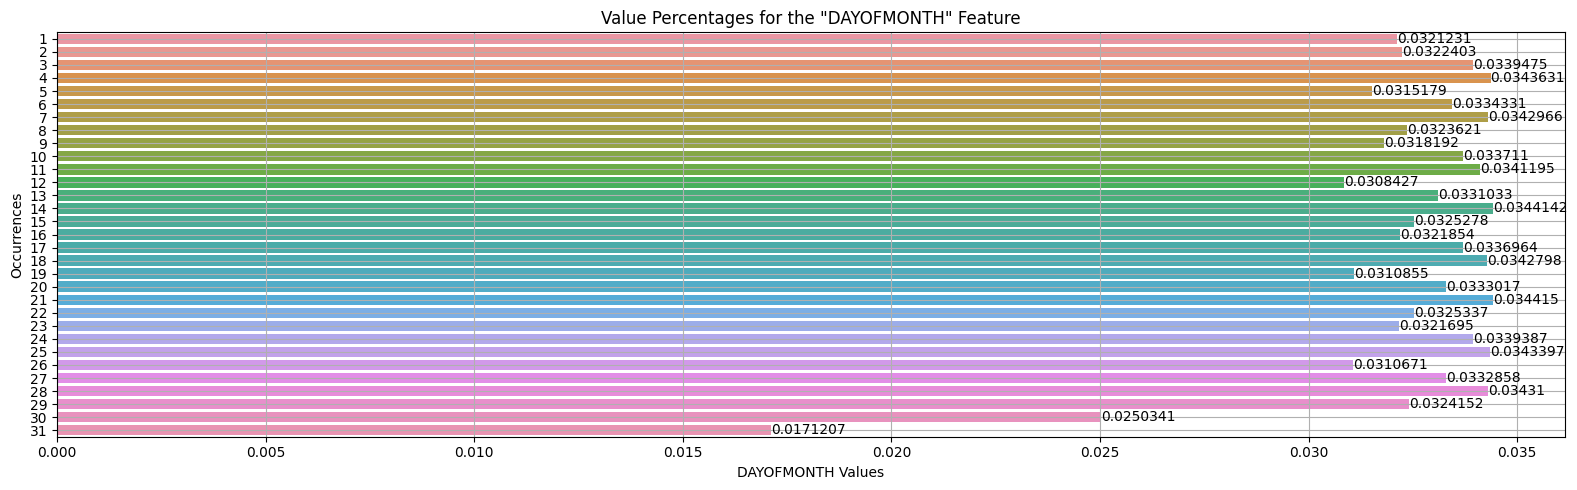


/────────────────────────────────────────────────  FEATURE: DAYOFWEEK  ────────────────────────────────────────────────/



dayofweek  proportion
0          3      0.1530
1          2      0.1502
2          5      0.1467
3          4      0.1464
4          1      0.1456
5          7      0.1374
6          6      0.1206

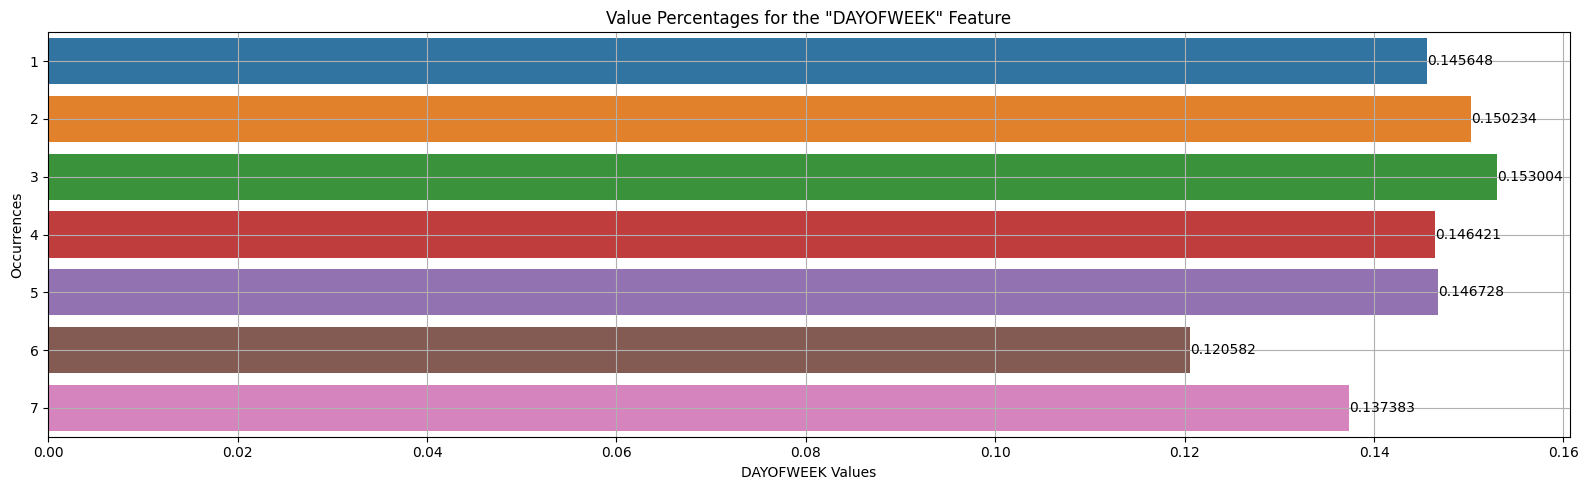


/─────────────────────────────────────────────────  FEATURE: DEPTIME  ─────────────────────────────────────────────────/



deptime  proportion
0         NaN      0.0270
1    600.0000      0.0024
2    555.0000      0.0024
3    700.0000      0.0023
4    655.0000      0.0021
...       ...         ...
1430 246.0000      0.0000
1431 322.0000      0.0000
1432 347.0000      0.0000
1433 312.0000      0.0000
1434 307.0000      0.0000

[1435 rows x 2 columns]

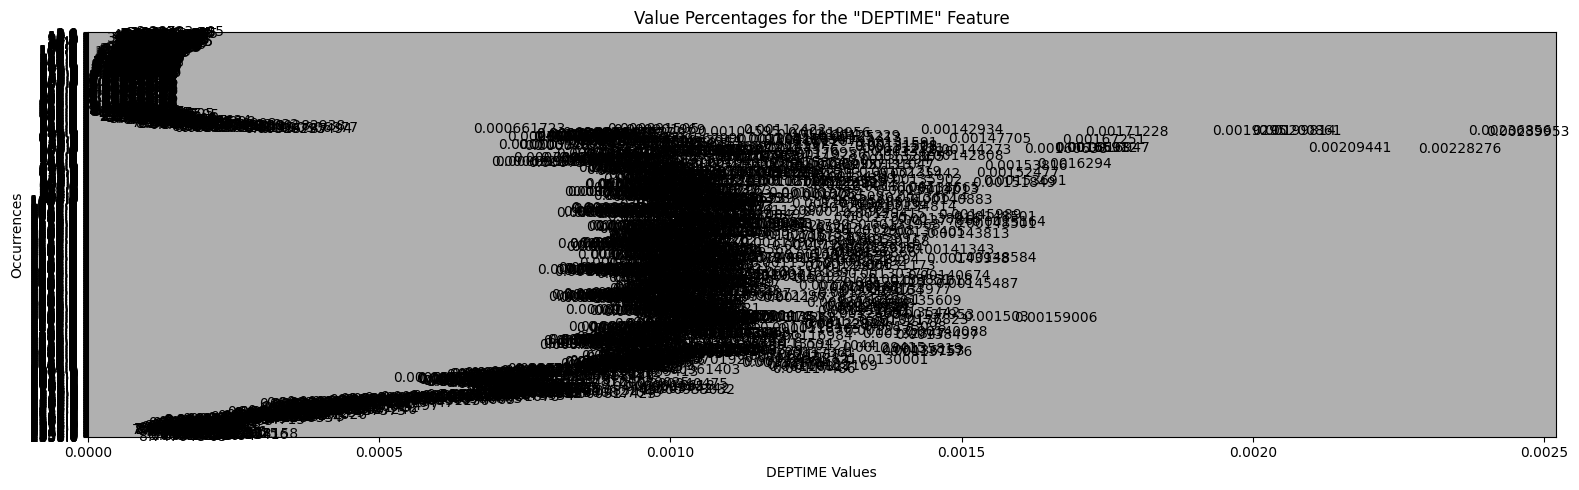


/───────────────────────────────────────────────  FEATURE: CRSDEPTIME  ───────────────────────────────────────────────/



crsdeptime  proportion
0            600      0.0194
1            700      0.0138
2            800      0.0092
3            630      0.0084
4            900      0.0074
...          ...         ...
1153          48      0.0000
1154         127      0.0000
1155         352      0.0000
1156         516      0.0000
1157         125      0.0000

[1158 rows x 2 columns]

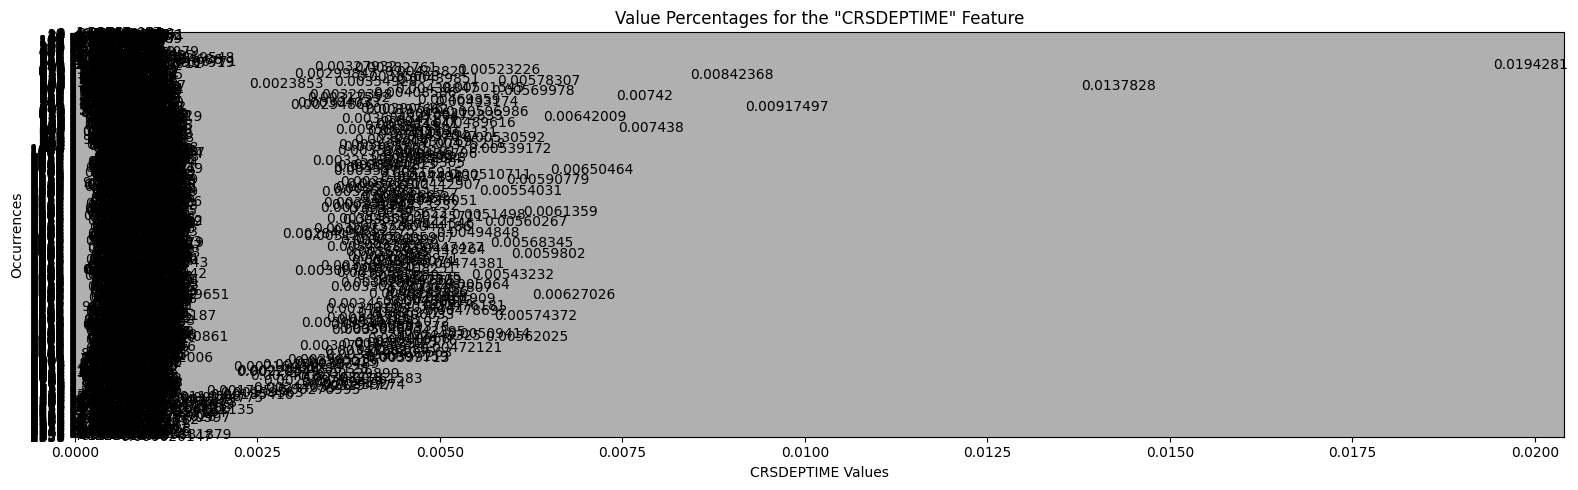


/─────────────────────────────────────────────────  FEATURE: ARRTIME  ─────────────────────────────────────────────────/



arrtime  proportion
0          NaN      0.0293
1    1600.0000      0.0012
2    1615.0000      0.0012
3    1810.0000      0.0012
4    1020.0000      0.0012
...        ...         ...
1436  359.0000      0.0000
1437  349.0000      0.0000
1438  402.0000      0.0000
1439  416.0000      0.0000
1440  358.0000      0.0000

[1441 rows x 2 columns]

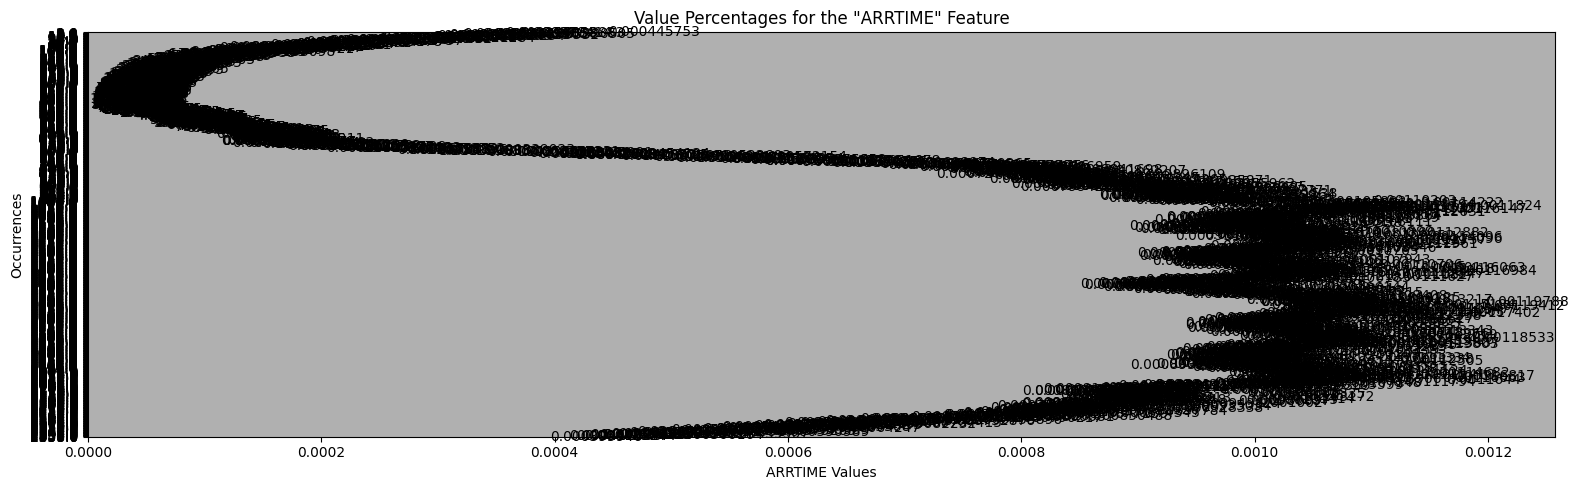


/───────────────────────────────────────────────  FEATURE: CRSARRTIME  ───────────────────────────────────────────────/



crsarrtime  proportion
0           1615      0.0036
1           1930      0.0036
2           1600      0.0035
3           1130      0.0034
4           2040      0.0034
...          ...         ...
1326         257      0.0000
1327         442      0.0000
1328         150      0.0000
1329          59      0.0000
1330         129      0.0000

[1331 rows x 2 columns]

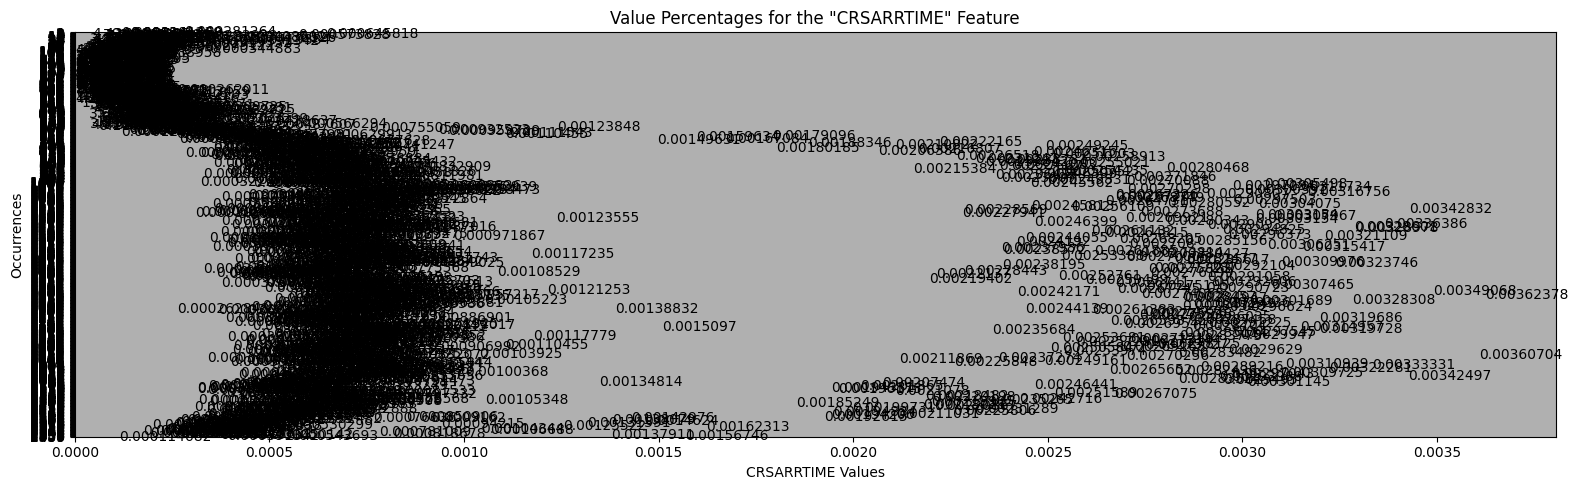


/────────────────────────────────────────────────  FEATURE: FLIGHTNUM  ────────────────────────────────────────────────/



flightnum  proportion
0           511      0.0007
1            16      0.0007
2           118      0.0007
3            73      0.0007
4            43      0.0007
...         ...         ...
7264       4980      0.0000
7265       4992      0.0000
7266       4986      0.0000
7267       4981      0.0000
7268       6446      0.0000

[7269 rows x 2 columns]

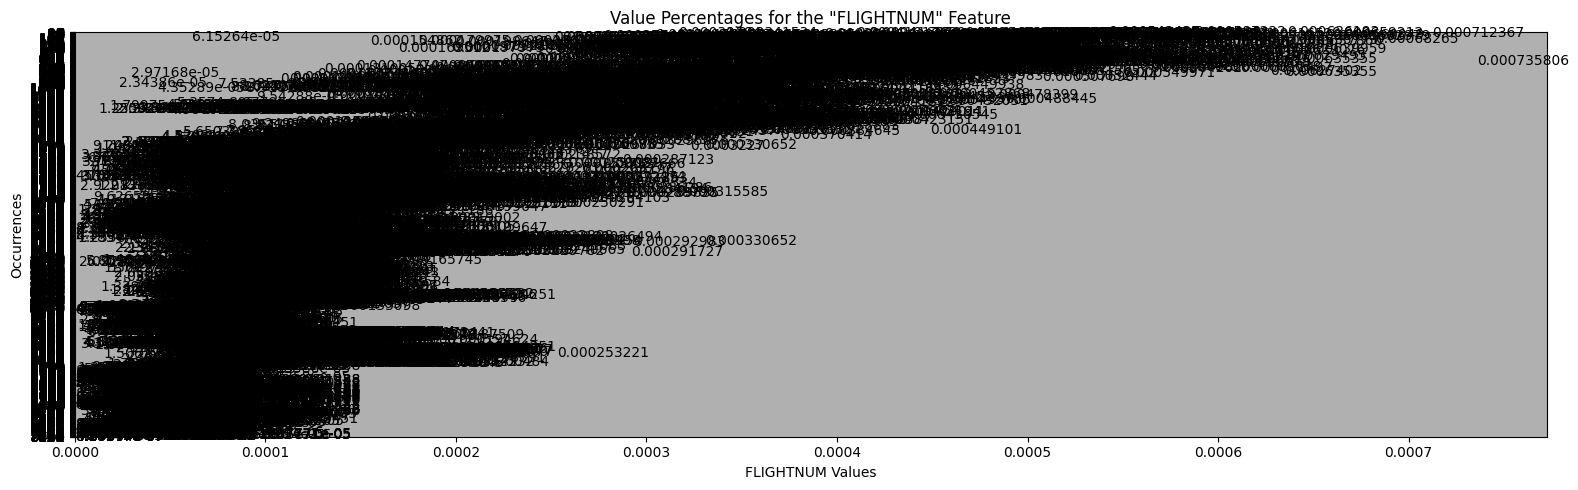


/────────────────────────────────────────────  FEATURE: ACTUALELAPSEDTIME  ────────────────────────────────────────────/



actualelapsedtime  proportion
0                  NaN      0.0293
1              75.0000      0.0091
2              80.0000      0.0091
3              70.0000      0.0089
4              85.0000      0.0086
..                 ...         ...
664           627.0000      0.0000
665           689.0000      0.0000
666           682.0000      0.0000
667           629.0000      0.0000
668           608.0000      0.0000

[669 rows x 2 columns]

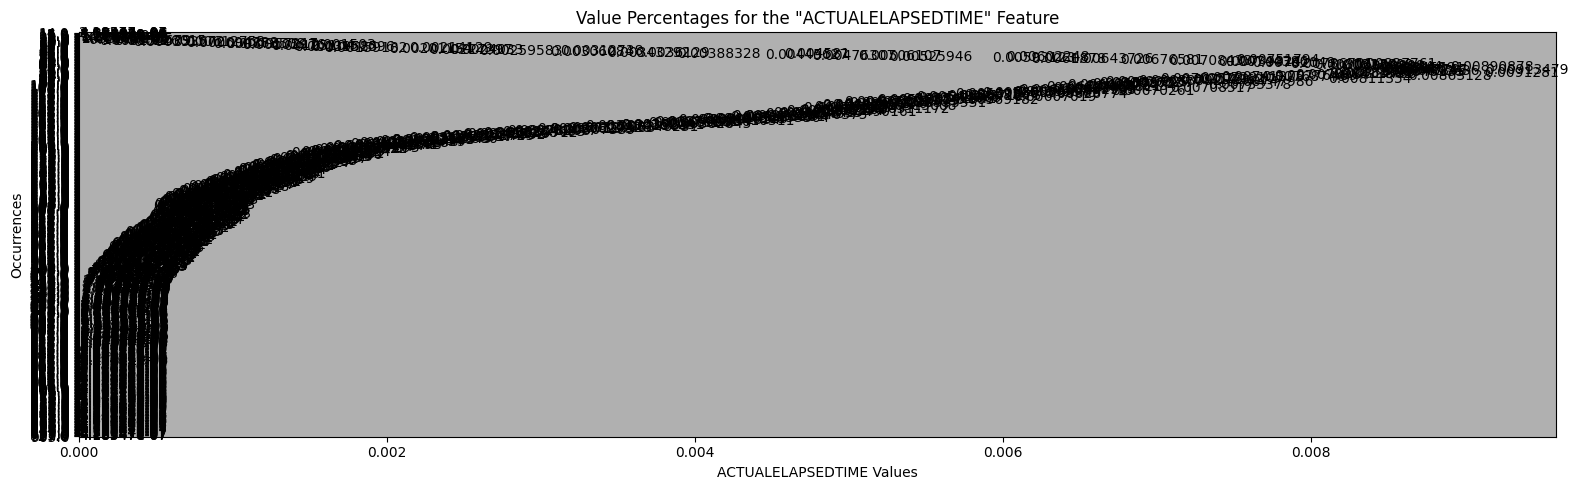


/─────────────────────────────────────────────  FEATURE: CRSELAPSEDTIME  ─────────────────────────────────────────────/



crselapsedtime  proportion
0           75.0000      0.0266
1           65.0000      0.0254
2           70.0000      0.0247
3           80.0000      0.0237
4           85.0000      0.0233
..              ...         ...
472         10.0000      0.0000
473        -25.0000      0.0000
474          5.0000      0.0000
475        602.0000      0.0000
476        449.0000      0.0000

[477 rows x 2 columns]

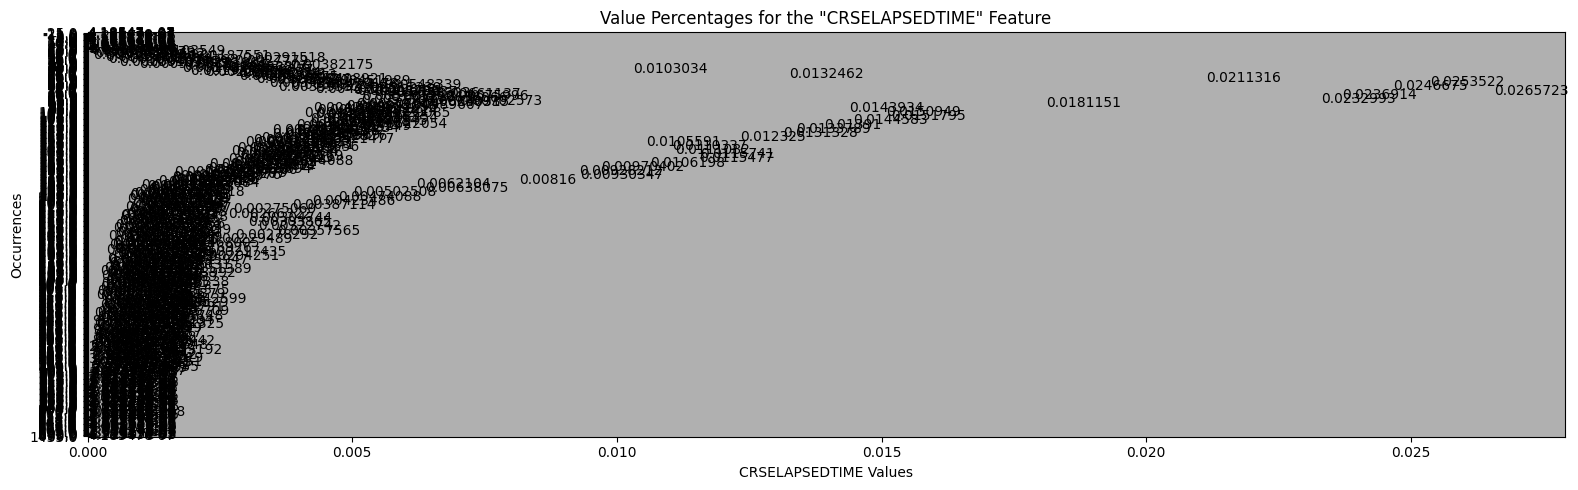


/─────────────────────────────────────────────────  FEATURE: AIRTIME  ─────────────────────────────────────────────────/



airtime  proportion
0        NaN      0.0293
1    45.0000      0.0095
2    50.0000      0.0095
3    53.0000      0.0095
4    51.0000      0.0095
..       ...         ...
644 611.0000      0.0000
645 634.0000      0.0000
646 595.0000      0.0000
647 652.0000      0.0000
648 597.0000      0.0000

[649 rows x 2 columns]

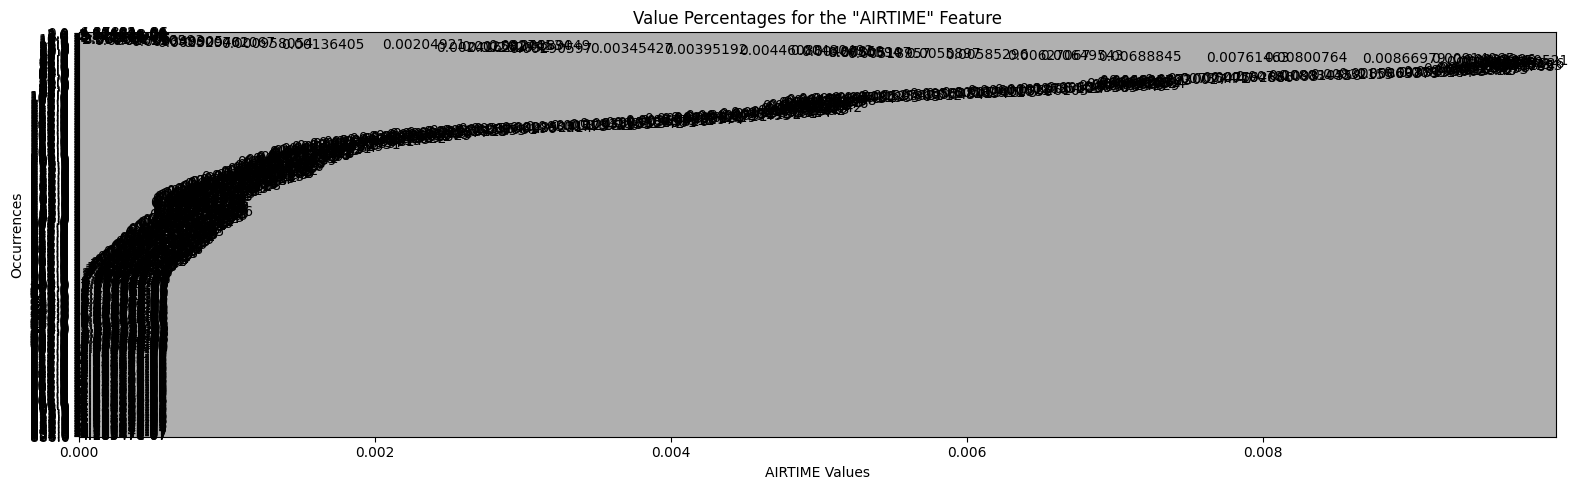


/────────────────────────────────────────────────  FEATURE: ARRDELAY  ────────────────────────────────────────────────/



arrdelay  proportion
0         NaN      0.0293
1     -5.0000      0.0287
2     -6.0000      0.0286
3     -4.0000      0.0281
4     -7.0000      0.0279
..        ...         ...
931  733.0000      0.0000
932 1542.0000      0.0000
933 1104.0000      0.0000
934  722.0000      0.0000
935  675.0000      0.0000

[936 rows x 2 columns]

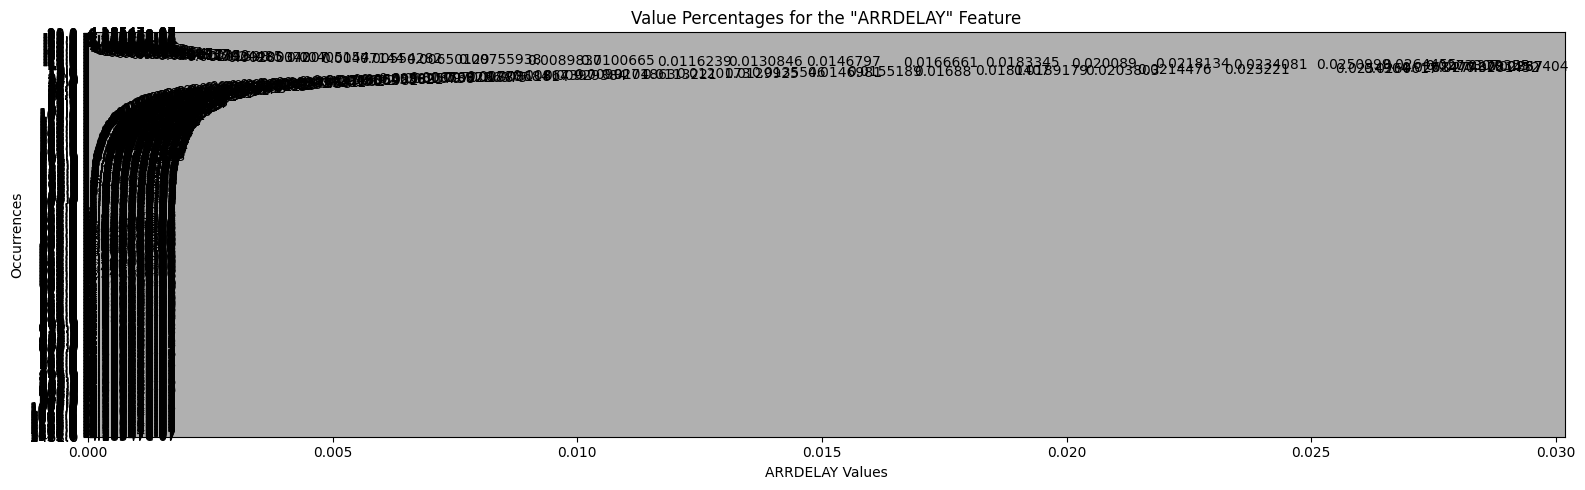


/────────────────────────────────────────────────  FEATURE: DEPDELAY  ────────────────────────────────────────────────/



depdelay  proportion
0      0.0000      0.0760
1     -5.0000      0.0714
2     -3.0000      0.0657
3     -2.0000      0.0651
4     -4.0000      0.0636
..        ...         ...
917 1490.0000      0.0000
918  761.0000      0.0000
919  647.0000      0.0000
920  672.0000      0.0000
921  716.0000      0.0000

[922 rows x 2 columns]

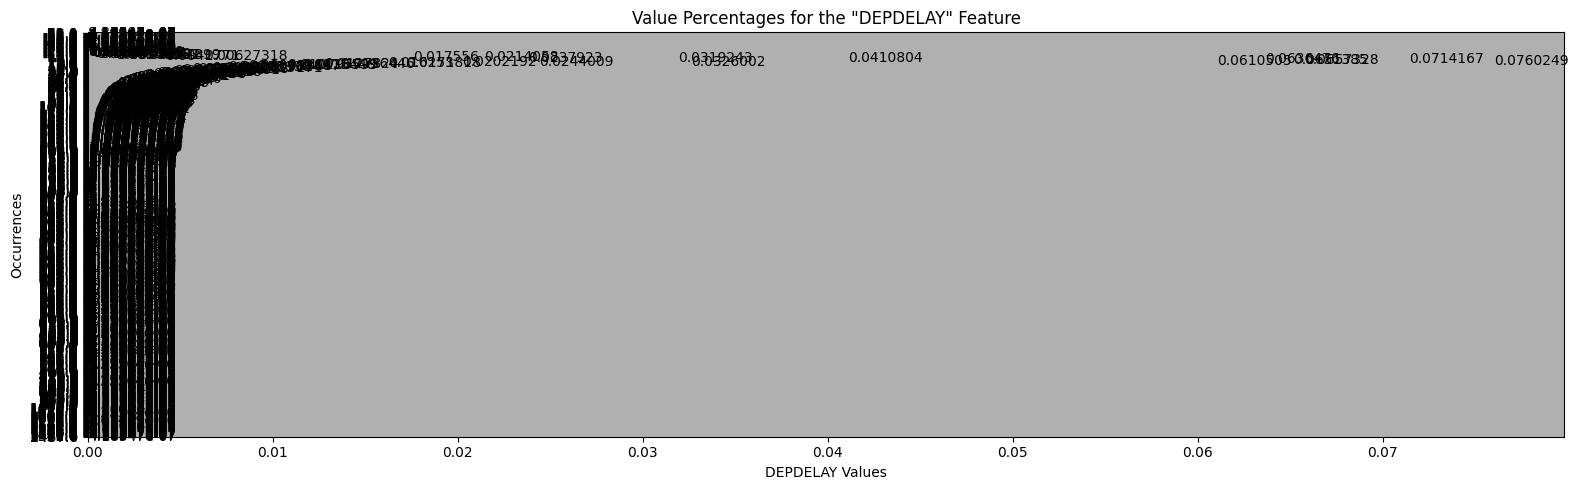


/────────────────────────────────────────────────  FEATURE: DISTANCE  ────────────────────────────────────────────────/



distance  proportion
0          337      0.0062
1          214      0.0048
2          109      0.0046
3          256      0.0045
4          403      0.0043
...        ...         ...
1372       117      0.0000
1373       111      0.0000
1374      1408      0.0000
1375       343      0.0000
1376       832      0.0000

[1377 rows x 2 columns]

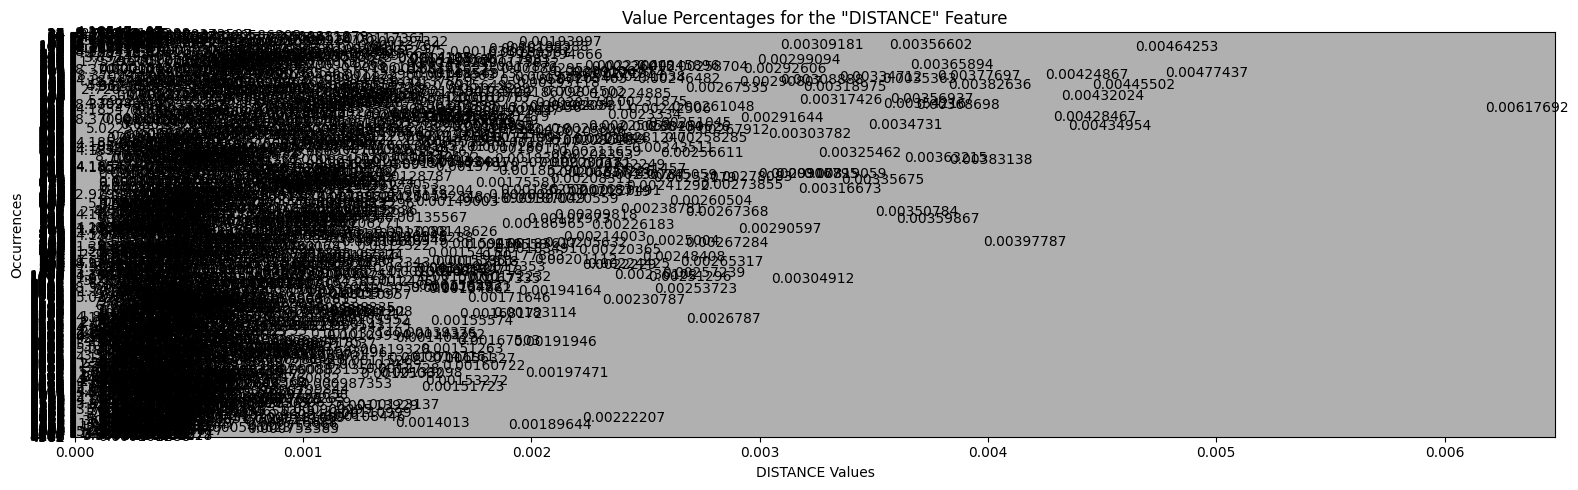


/─────────────────────────────────────────────────  FEATURE: TAXIIN  ─────────────────────────────────────────────────/



taxiin  proportion
0     4.0000      0.1582
1     5.0000      0.1554
2     6.0000      0.1195
3     3.0000      0.1134
4     7.0000      0.0911
..       ...         ...
161 157.0000      0.0000
162 184.0000      0.0000
163 149.0000      0.0000
164 159.0000      0.0000
165 200.0000      0.0000

[166 rows x 2 columns]

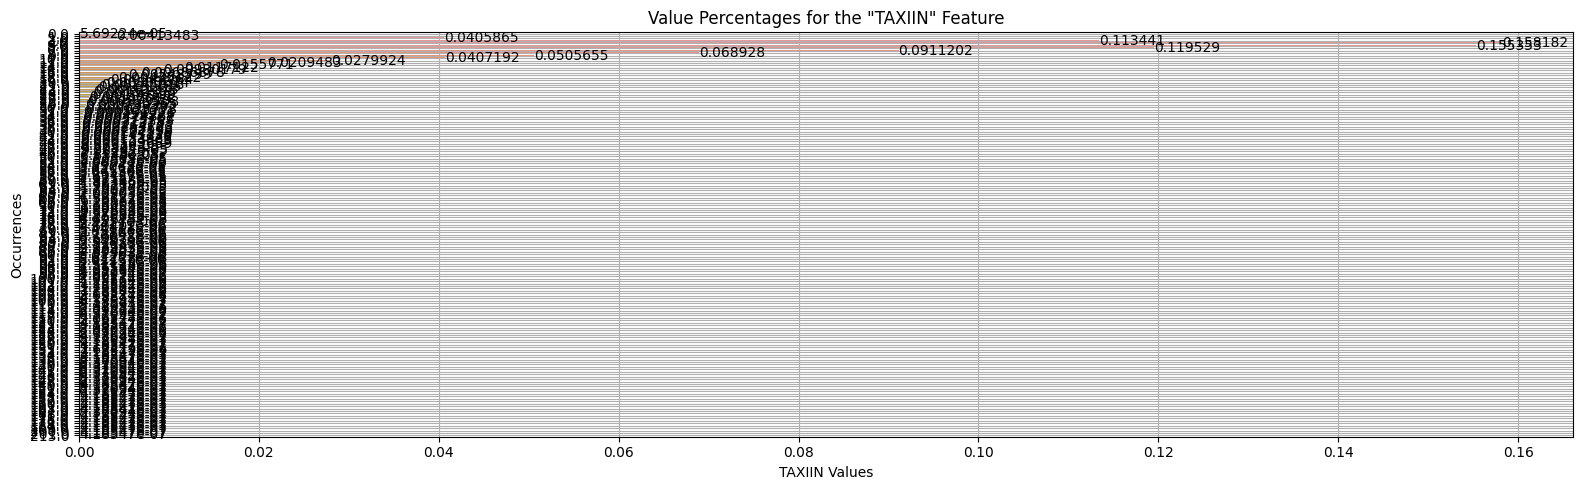


/─────────────────────────────────────────────────  FEATURE: TAXIOUT  ─────────────────────────────────────────────────/



taxiout  proportion
0    10.0000      0.0696
1    11.0000      0.0689
2    12.0000      0.0675
3    13.0000      0.0637
4     9.0000      0.0629
..       ...         ...
273 259.0000      0.0000
274 267.0000      0.0000
275 312.0000      0.0000
276 231.0000      0.0000
277 227.0000      0.0000

[278 rows x 2 columns]

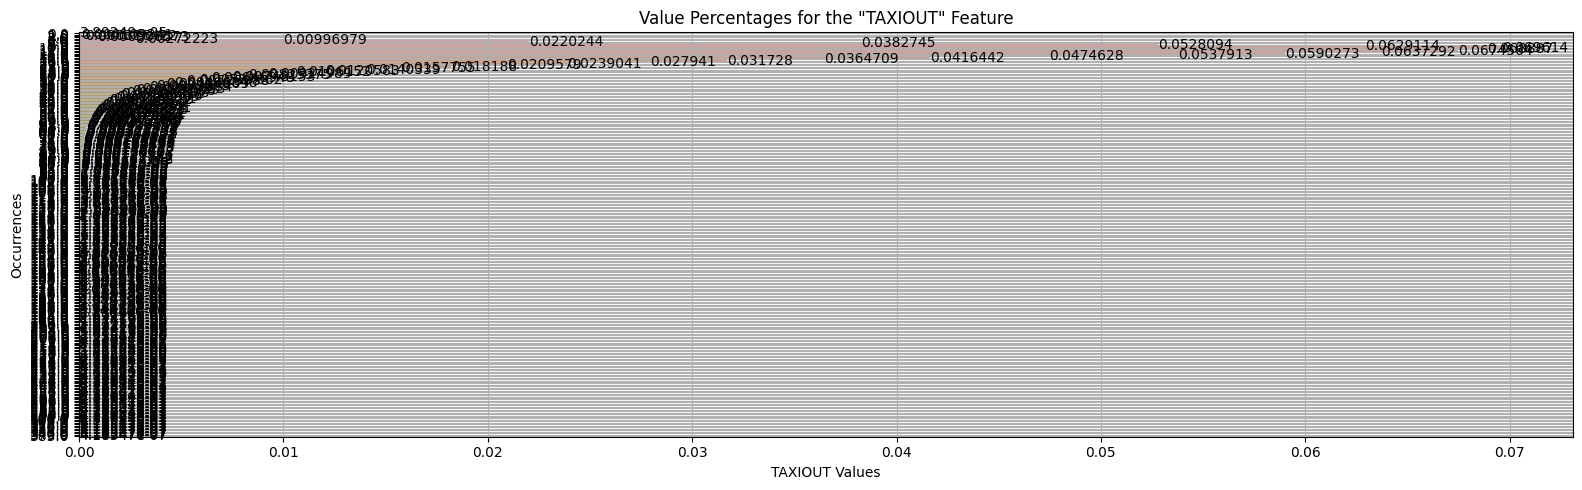


/────────────────────────────────────────────────  FEATURE: CANCELLED  ────────────────────────────────────────────────/



cancelled  proportion
0          0      0.9730
1          1      0.0270

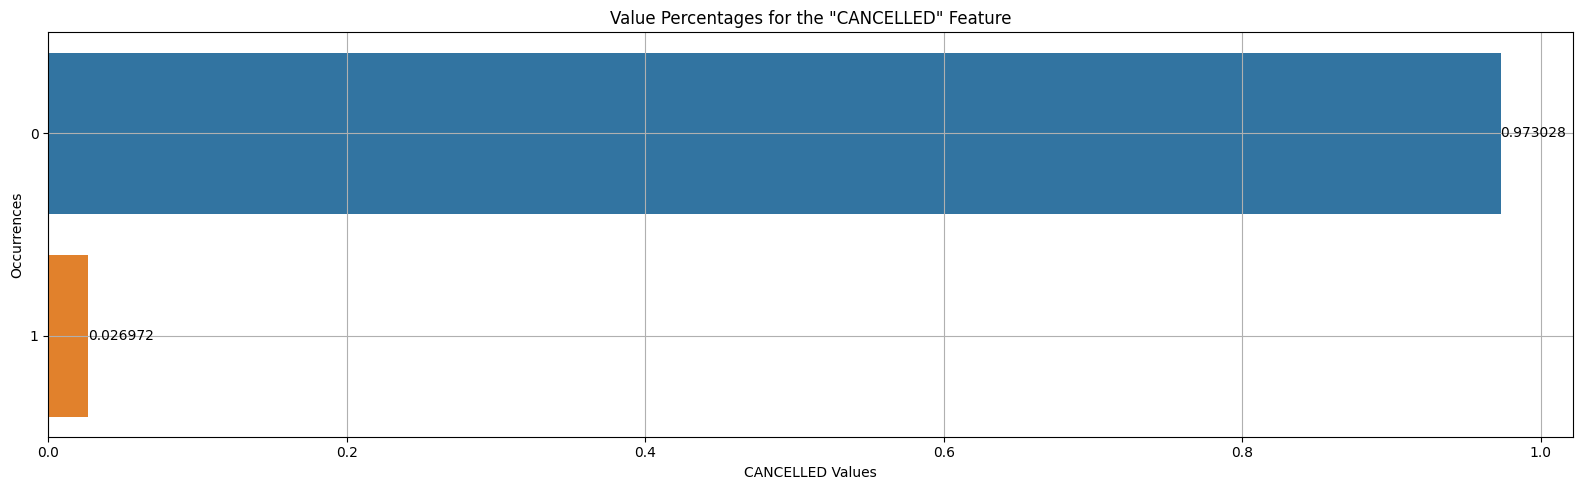


/────────────────────────────────────────────────  FEATURE: DIVERTED  ────────────────────────────────────────────────/



diverted  proportion
0         0      0.9976
1         1      0.0024

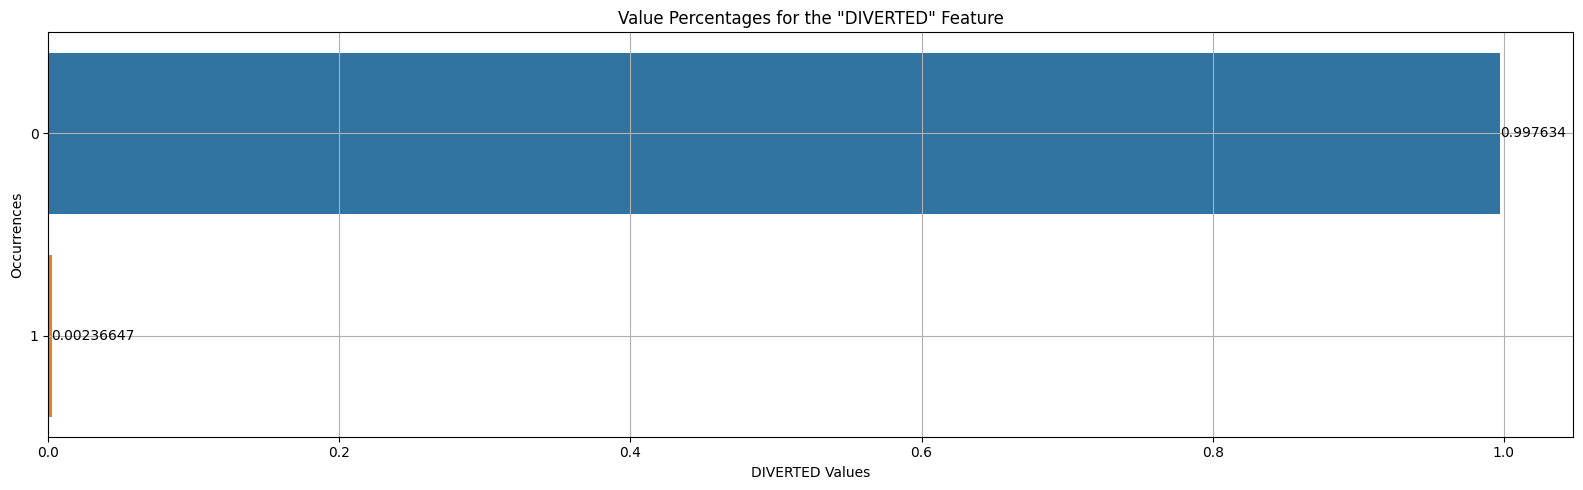


/──────────────────────────────────────────────  FEATURE: CARRIERDELAY  ──────────────────────────────────────────────/



carrierdelay  proportion
0             NaN      0.7553
1          0.0000      0.1364
2          6.0000      0.0037
3          7.0000      0.0035
4          1.0000      0.0034
..            ...         ...
777     1075.0000      0.0000
778      471.0000      0.0000
779     1044.0000      0.0000
780      599.0000      0.0000
781      667.0000      0.0000

[782 rows x 2 columns]

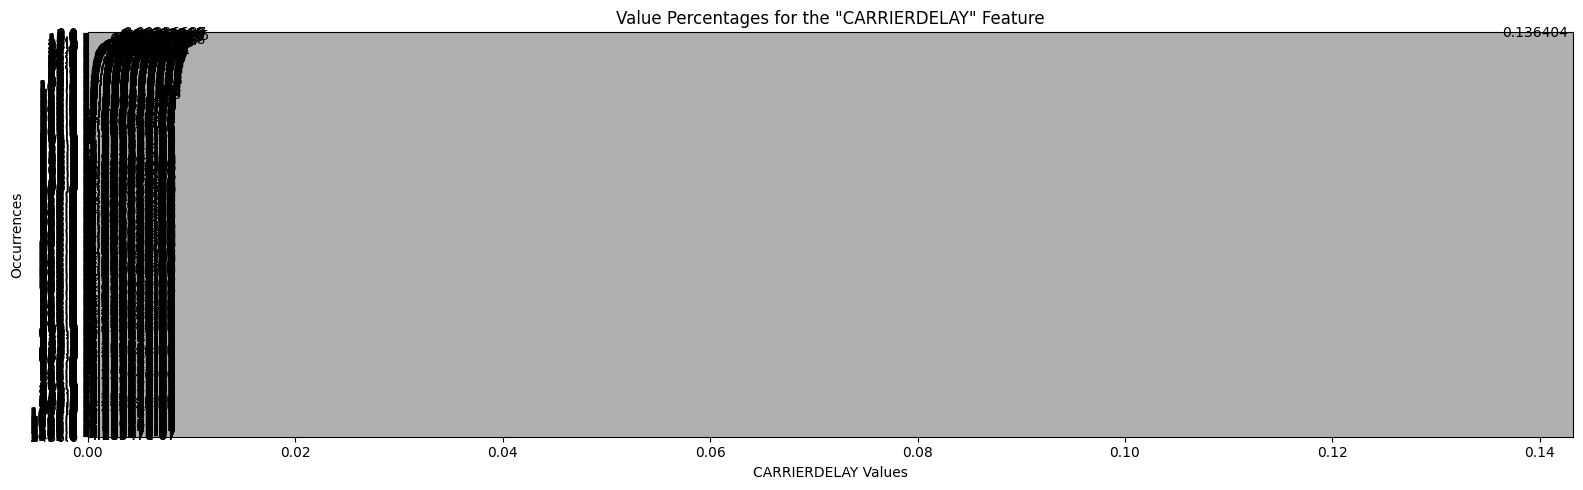


/──────────────────────────────────────────────  FEATURE: WEATHERDELAY  ──────────────────────────────────────────────/



weatherdelay  proportion
0             NaN      0.7553
1          0.0000      0.2289
2         10.0000      0.0005
3         15.0000      0.0005
4          6.0000      0.0004
..            ...         ...
477      471.0000      0.0000
478      536.0000      0.0000
479      872.0000      0.0000
480      567.0000      0.0000
481      610.0000      0.0000

[482 rows x 2 columns]

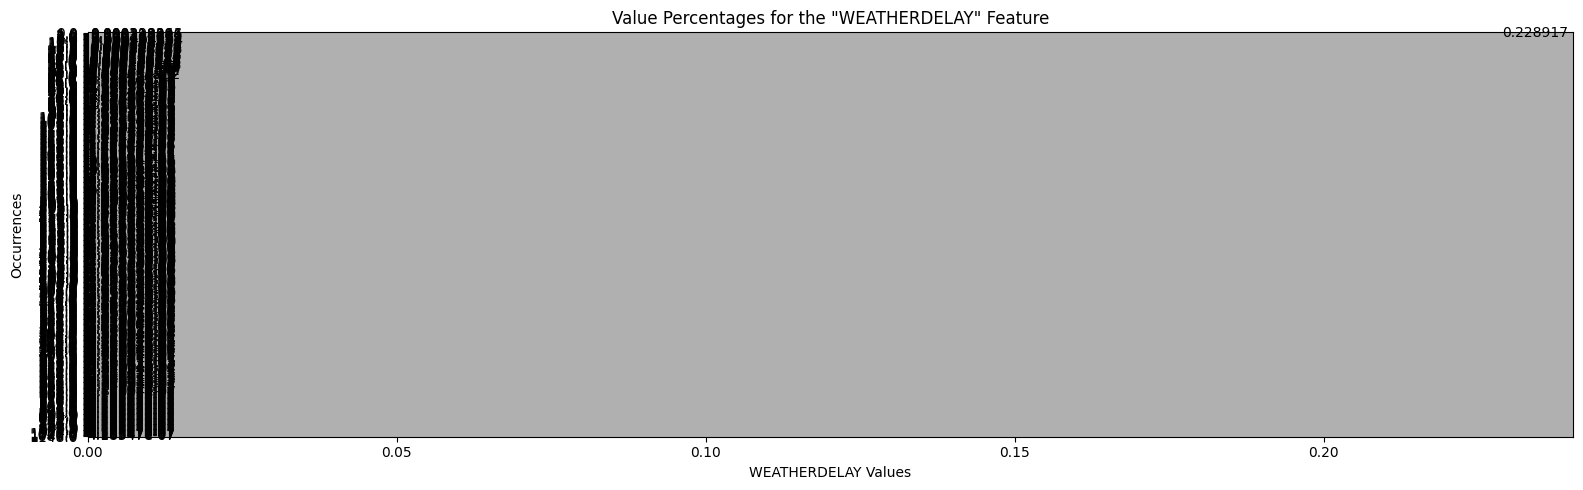


/────────────────────────────────────────────────  FEATURE: NASDELAY  ────────────────────────────────────────────────/



nasdelay  proportion
0         NaN      0.7553
1      0.0000      0.0983
2     15.0000      0.0063
3     16.0000      0.0056
4      1.0000      0.0054
..        ...         ...
479  699.0000      0.0000
480  370.0000      0.0000
481  437.0000      0.0000
482  455.0000      0.0000
483  475.0000      0.0000

[484 rows x 2 columns]

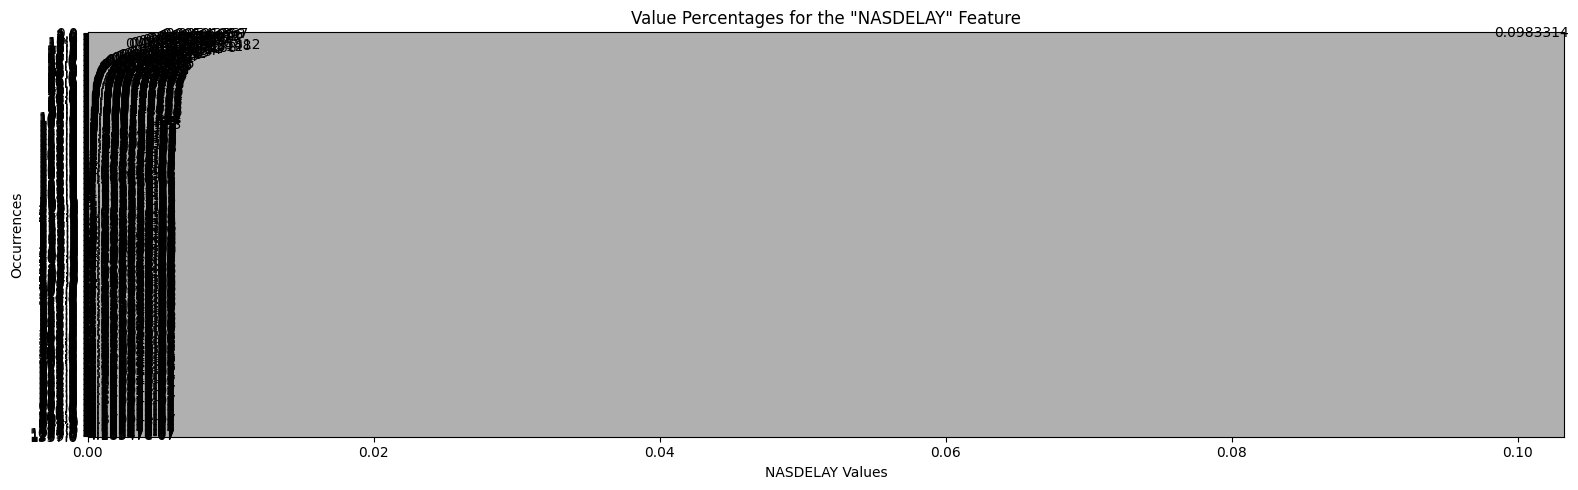


/──────────────────────────────────────────────  FEATURE: SECURITYDELAY  ──────────────────────────────────────────────/



securitydelay  proportion
0              NaN      0.7553
1           0.0000      0.2435
2           7.0000      0.0001
3           8.0000      0.0001
4           6.0000      0.0001
..             ...         ...
105        76.0000      0.0000
106        73.0000      0.0000
107       108.0000      0.0000
108       132.0000      0.0000
109       392.0000      0.0000

[110 rows x 2 columns]

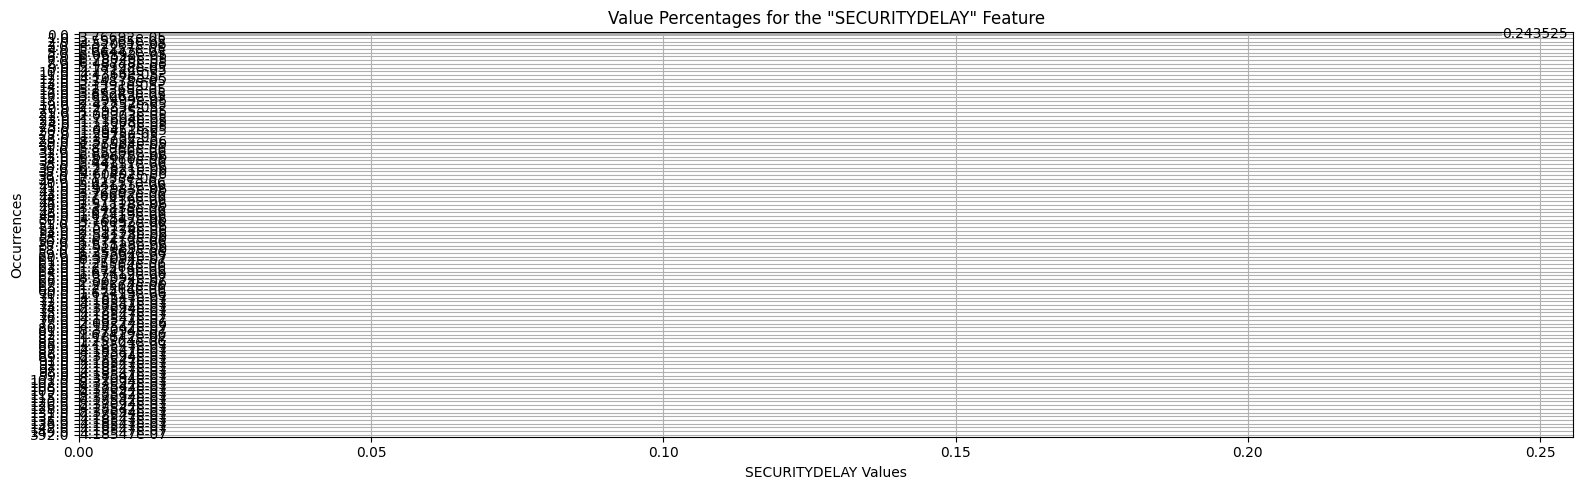


/────────────────────────────────────────────  FEATURE: LATEAIRCRAFTDELAY  ────────────────────────────────────────────/



lateaircraftdelay  proportion
0                  NaN      0.7553
1               0.0000      0.1295
2              15.0000      0.0033
3              16.0000      0.0030
4              17.0000      0.0028
..                 ...         ...
470           407.0000      0.0000
471           462.0000      0.0000
472           430.0000      0.0000
473           469.0000      0.0000
474           489.0000      0.0000

[475 rows x 2 columns]

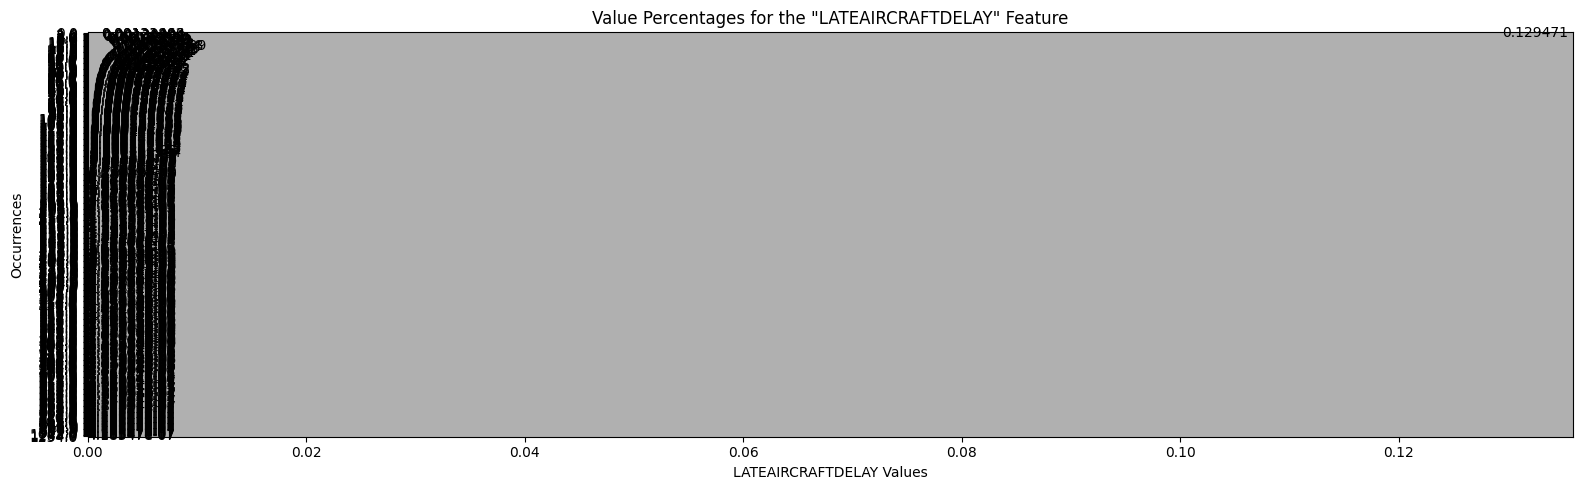

KeyError: 'flight_outcome'

In [21]:
'''
Iterate over the numerical features:
    * Get it's unique values and counts for each
    * Plot the value counts to understand distribution
'''

for num in cols_num:
    df_cmv = pd.DataFrame(df[num].value_counts( dropna=False, normalize=True ).sort_values( ascending=False )).reset_index()
    print( helper_print_heading( f'Feature: {num}' ))
    display(df_cmv)

    ax = sns.barplot( df_cmv, x='proportion', y=num, orient='h' )
    ax.bar_label(ax.containers[0])
    plt.title(f'Value Percentages for the "{num.upper()}" Feature' )
    plt.xlabel(f'{num.upper()} Values')
    plt.ylabel('Occurrences')
    plt.tight_layout()
    plt.grid()
    plt.show()

---

***💡 Insights: Univariate Analysis***
* Less than three percent (>3%) of flights were cancelled (`cancelled`)
* Less than half a percent (>0.5%) of flights were diverted (`diverted`)

---

#### 2.4.4 Multivariate Analysis
* Correlation Matrix (Heatmap)
* Histograms

In [ ]:
# Seaborn heatmap of dataframe correlation 
mask = np.triu(np.ones_like(df.corr(numeric_only=True).round(2)))
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True)

In [ ]:
df.hist(figsize=(20,20));
plt.tight_layout()


In [ ]:
# df.plot(kind="bar", figsize=(20,20), subplots=True )
# plt.tight_layout()

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">3.0 Data Preparation</h2>

* Drop duplicate records
* Drop remaining missing values (2.93% decrease in data size, acceptable)
* Create dataframe with only useful features (good predictive power), either due to high multicollinearity or redundancy in definition.
* Feature engineering (Polynomial Features)
* Scale all numerical features (`int*` and `float*` data types)
* Binarize relevant categorical features (`['']`)
  

In [ ]:
'''
Drop Duplicates (expecting 4 duplicate records to drop)
Drop Remaining Records with Missing Values
'''

df_prep = df_opt.dropna().drop_duplicates()

# validate 4 records were dropped
df_opt.shape[0] - df_prep.shape[0]

### 3.5 Feature Selection
* Subset Dataframe to only use features deemed important

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">4.0 General Initial Models</h2>

Use multiple regression models 
* Dummy Classifier (baseline)
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Support Vector Machines
* RandomForest Decision Tree

Evaluate on:
* Confusion Matrix
* Model Scoring
  
### 4.1 Establish Evaluation Metric Baseline


<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">5.0 Model Evaluation and Improvement</h2>

Through cross-validation techniques, identify the best hyperparameters per regression model, to improve model scoring and selection

### 4.1 Gridsearch hyperparameters

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">6.0 Deployment</h2>

* Identify a Pipeline using the optimized parameters and selected model
  

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">7.0 Findings</h2>

* Clearly states business understanding of the problem
* Clean and organized notebook with data cleaning
* Correct and concise interpretation of descriptive and inferential statistics
* Clearly states findings in their own section with actionable items highlighted in appropriate language for a nontechnical audience
* Next steps and recommendations